## TASK 1: DATA PREPARATION (30 POINTS)
The first phase of a Data Mining project typically includes getting familiar with the domain and pre-processing the dataset in a suitable manner. In this part of the assignment, we will go through those steps.

### TASK 1A: EXPLORATORY DATA ANALYSIS (10 POINTS)
Start with exploring the raw data that is available: \
• Notice all sorts of properties of the dataset: how many records are there, how many
attributes, what kinds of attributes are there, ranges of values, distribution of values,
relationships between attributes, missing values, and so on. A table is often a suitable
way of showing such properties of a dataset. Notice if something is interesting (to you,
or in general), make sure you write it down if you find something worth mentioning. \
• Make various plots of the data. Is there something interesting worth reporting? Report the figures, discuss what is in them. What meaning do those bars, lines, dots, etc.
convey? Please select essential and interesting plots for discussion, as you have limited
space for reporting your findings.

In [1]:
# Import libraries
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
# Import as Dataframe
df = pd.read_csv('./Data/dataset_mood_smartphone.csv')
df.head()

# Drop unnecessary columns
data =  df.drop(['Unnamed: 0'], axis=1)
    
# Make sure the 'time' column is of type datetime
data['time'] = pd.to_datetime(data['time'])

In [3]:
# Inspect the dataset
print(f"Number of records: {len(data)}")
print(f"Number of attributes: {len(data.columns)}")
print(f"Attribute types:\n{data.dtypes}")
print(f"Ranges of values:\n{data['value'].describe()}")

Number of records: 376912
Number of attributes: 4
Attribute types:
id                  object
time        datetime64[ns]
variable            object
value              float64
dtype: object
Ranges of values:
count    376710.000000
mean         40.665313
std         273.726007
min      -82798.871000
25%           2.025000
50%           7.029000
75%          29.356000
max       33960.246000
Name: value, dtype: float64


In [4]:
# Check for missing values
print(f"Number of missing values:\n{data.isnull().sum()}") # 202 missing values in the 'value' column

# Generate descriptive statistics for the dataset
print(data.describe())

# Counts of values recorded per month
pd.to_datetime(data["time"]).dt.to_period('M').value_counts().sort_index()

Number of missing values:
id            0
time          0
variable      0
value       202
dtype: int64
                                time          value
count                         376912  376710.000000
mean   2014-04-16 05:01:16.959544064      40.665313
min       2014-02-17 07:00:52.197000  -82798.871000
25%              2014-04-03 15:00:00       2.025000
50%    2014-04-15 22:13:12.874500096       7.029000
75%    2014-04-27 19:25:38.207000064      29.356000
max              2014-06-09 00:00:00   33960.246000
std                              NaN     273.726007


time
2014-02      1102
2014-03     73620
2014-04    233483
2014-05     66808
2014-06      1899
Freq: M, Name: count, dtype: int64

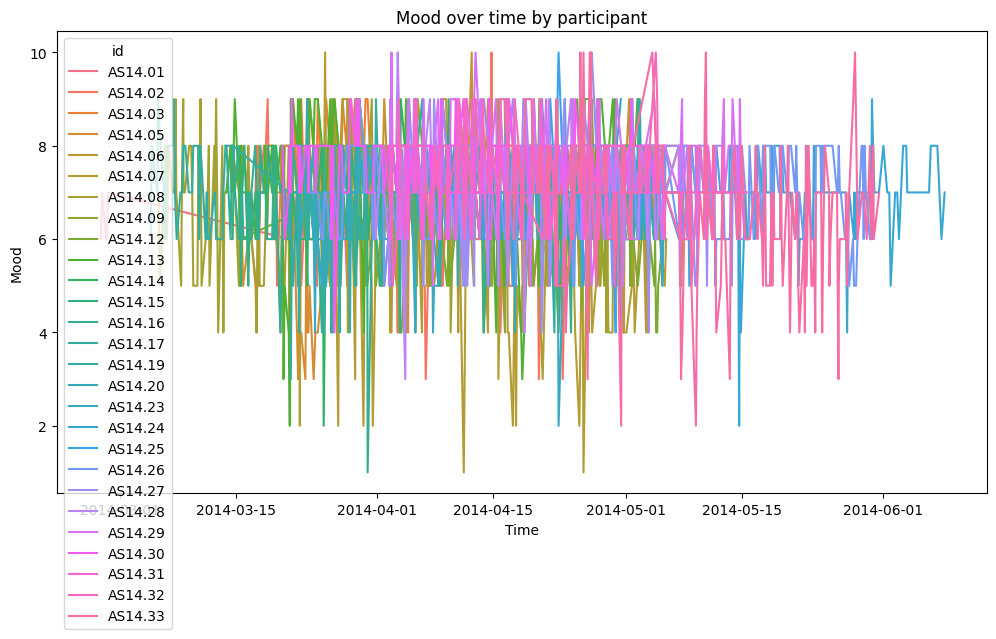

In [5]:
# Create line plot of mood variable over time for each participant
plt.figure(figsize=(12, 6))
sns.lineplot(x='time', y='value', data=data[data['variable'] == 'mood'], hue='id')
plt.title('Mood over time by participant')
plt.xlabel('Time')
plt.ylabel('Mood')
plt.show()

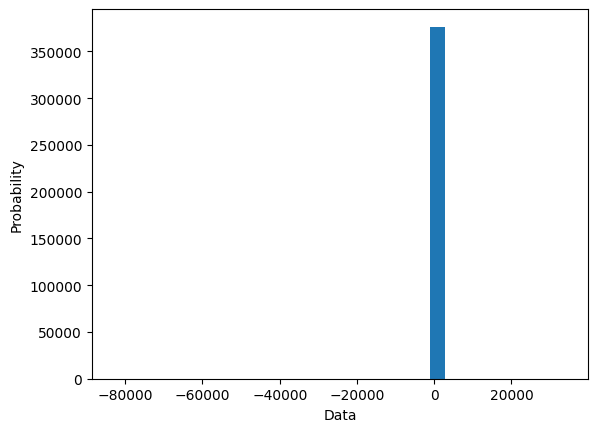

In [6]:
# Data not normally distributed, a lot of extreme values
# Show histograms - all variables except for the identifier variables
plt.hist(np.array(data['value'].tolist()).astype('float'), density=False, bins=30)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data')
plt.show()


### TASK 1B: DATA CLEANING (10 POINTS)
As the insights from Task 1A will have shown, the dataset you analyze contains quite some
noise. Values are sometimes missing, and extreme or incorrect values are seen that are likely
outliers you may want to remove from the dataset. We will clean the dataset in two steps: \
• Apply an approach to remove extreme and incorrect values from your dataset. Describe
what your approach is, why you consider that to be a good approach, and describe what
the result of applying the approach is. \
• Impute the missing values using two different approaches. Describe the approaches
and study the impact of applying them to your data. Argue which one of the two approaches would be most suitable and select that one to form your cleaned dataset. Also
base yourself on scientific literature for making your choice.
Advanced: The advanced dataset contains a number of time series, select approaches to impute missing values that are logical for such time series. Also consider what to do with prolonged periods of missing data in a time series.

In [7]:
from Preprocessing.datacleaning import remove_incorrect_values, convert_to_wide, DetectAnomalies

In [8]:
# Remove incorrect values
valid_df, removed_df = remove_incorrect_values(data)
removed_df

,id,time,variable,value
150040,AS14.02,2014-03-16 15:46:43.769,appCat.builtin,-44.689
159972,AS14.07,2014-04-30 14:18:06.200,appCat.builtin,-82798.871
162154,AS14.12,2014-04-02 16:42:16.523,appCat.builtin,-1.218
309805,AS14.02,2014-03-26 21:18:45.144,appCat.entertainment,-0.011


variable
id                       0.000000
date                     0.000000
activity                39.787126
appCat.builtin          39.432337
appCat.communication    40.040547
appCat.entertainment    56.918398
appCat.finance          89.508363
appCat.game             90.217942
appCat.office           86.011151
appCat.other            43.233654
appCat.social           49.923974
appCat.travel           78.256462
appCat.unknown          86.619361
appCat.utilities        78.053725
appCat.weather          94.272681
call                    32.184491
circumplex.arousal      35.732387
circumplex.valence      35.833756
mood                    35.732387
screen                  38.824126
sms                     62.797770
dtype: float64
variable  id  date  activity  appCat.builtin  appCat.communication   
id                                                                   
AS14.01    0     0        25              25                    25  \
AS14.02    0     0        32              32        

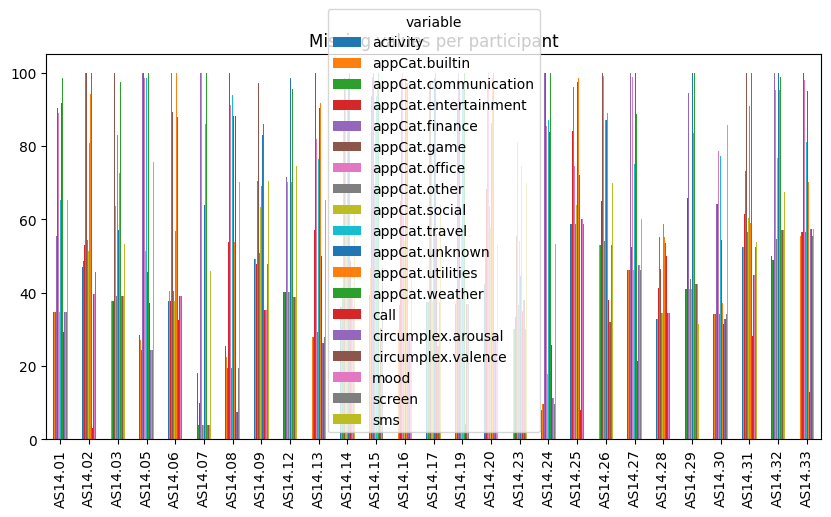

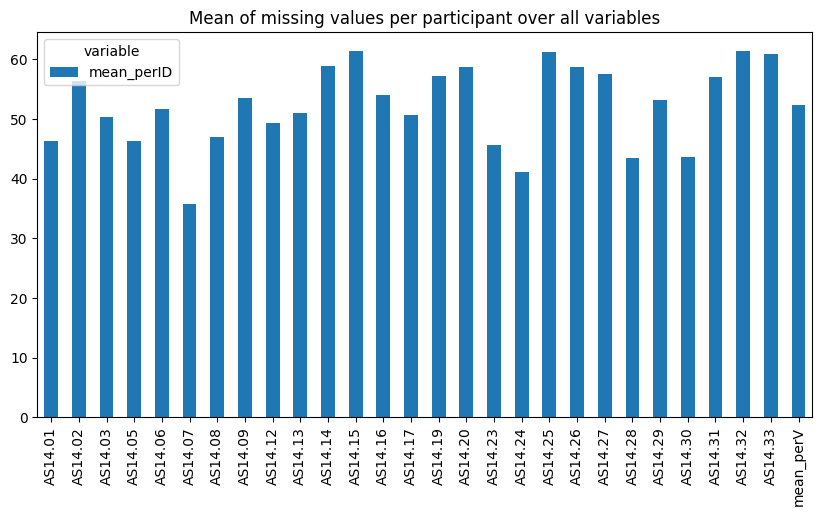

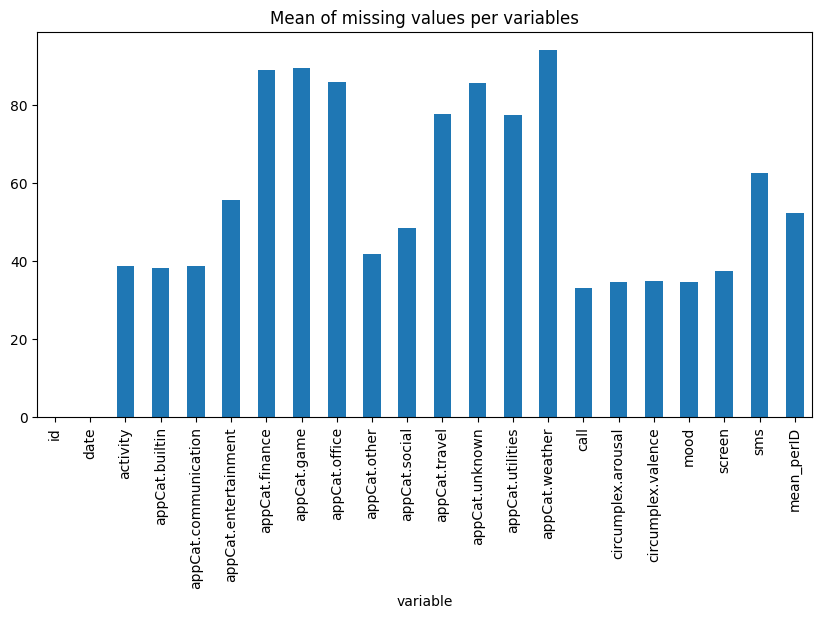

In [9]:
# Call the function and store the result in a new dataframe
new_df = convert_to_wide(valid_df)

# Check the percentage of missing values in the new dataframe for each column
print(new_df.isnull().sum() / len(new_df) * 100)

# Drop columns that contain more than 50% missing values
new_df['date'].min()
new_df['date'].max()

new_df['date'].nunique() # 113 unique days
new_df.groupby(['id', 'date']).count()

# Count the number of data points for each day per participant
new_df.groupby(['id', 'date']).count().groupby('id').count().reset_index()

# copy new_df 
new_df_copy = new_df.copy()

# Calculate the percentage of missing values for each row
new_df_copy['missing_percentage'] = new_df_copy.isnull().sum(axis=1) / len(new_df_copy.columns) * 100

# Sort id's with the highest percentage of missing values
new_df_copy.sort_values('missing_percentage', ascending=False)

# Calculate the percentage of missing values for each participant
new_df_copy[['id', 'missing_percentage']].groupby('id').mean().reset_index().sort_values('missing_percentage', ascending=False)


# Calculate the percentage of complete data for each participant per day
data_counts = new_df_copy.groupby(['id', 'date']).count().reset_index()

# Count the number of days that follow each other of the 'date' column for each participant
data_counts.groupby('id').apply(lambda x: x['date'].diff().dt.days == 1).groupby('id').sum().reset_index()

# Count the size of date gaps for each participant
data_counts.groupby('id').apply(lambda x: x['date'].diff().dt.days).groupby('id').max().reset_index()

# Count the number of missing values in each column per id in new_df
missing_values_per_id = new_df.groupby('id').apply(lambda x: x.isnull().sum())
print(missing_values_per_id)

# Fill a dataframe with a for loop with the number of missing values for each column for each participant where the rows are the variables and the columns are the participants id's
missing_values = pd.DataFrame(columns=new_df_copy['id'].unique(), index=new_df_copy.columns[:-1])

for id in new_df_copy['id'].unique():
    missing_values[id] = new_df_copy[new_df_copy['id'] == id].isnull().sum()/len(new_df_copy[new_df_copy['id'] == id]) * 100
    
# Plot the missing values for each participant
missing_values.iloc[2:,].T.plot(kind='bar', figsize=(10,5), title='Missing values per participant')
plt.show()

# Add the mean of the missing values per column and per row to the dataframe
missing_values.loc['mean_perID'] = missing_values.mean()
missing_values['mean_perV'] = missing_values.mean(axis=1)

# Plot the mean of the missing values perID
missing_values.iloc[-1:,].T.plot(kind='bar', figsize=(10,5), title='Mean of missing values per participant over all variables')
plt.show()     

# Plot the mean of the missing values perV
missing_values.iloc[:,-1].T.plot(kind='bar', figsize=(10,5), title='Mean of missing values per variables')
plt.show() 

# Calculate the number of participants up to 42 days in study, n (%)


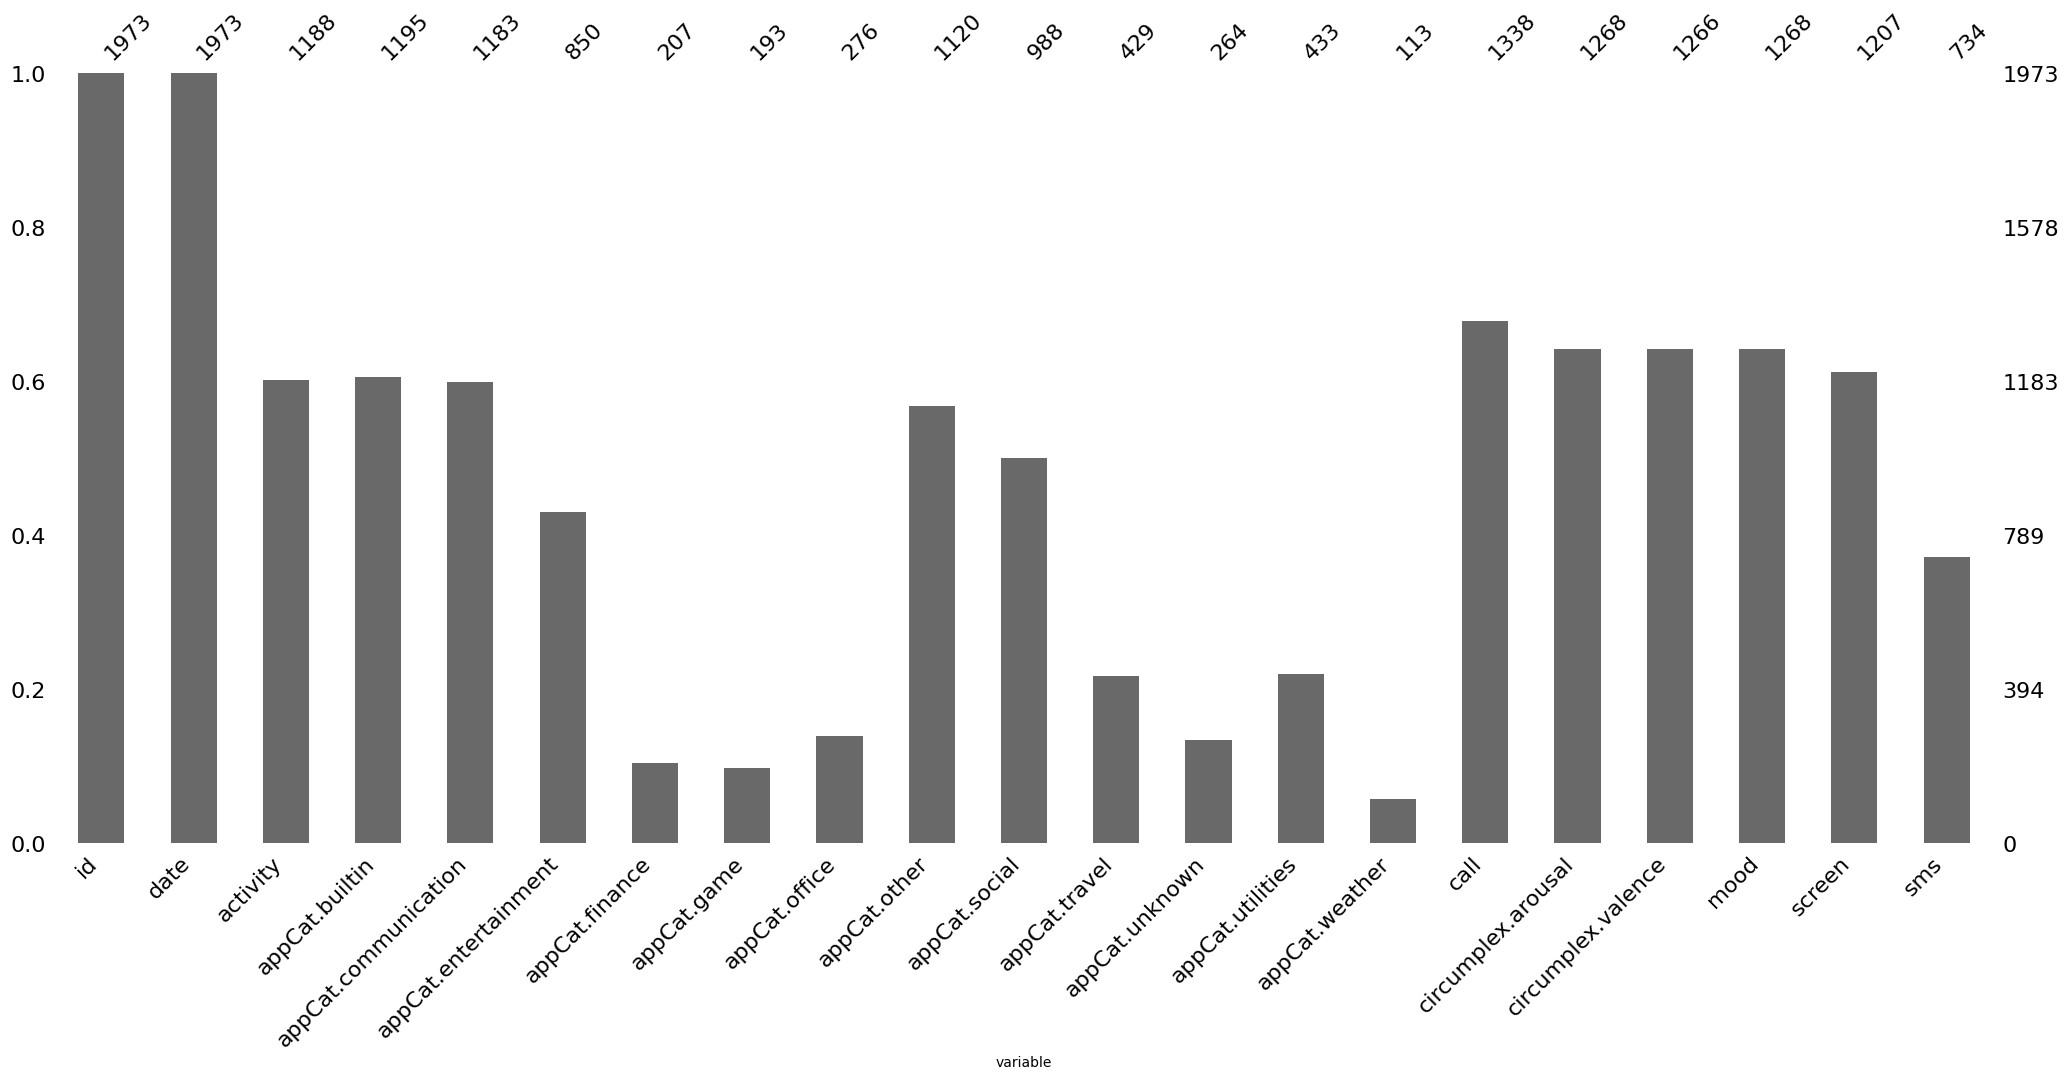

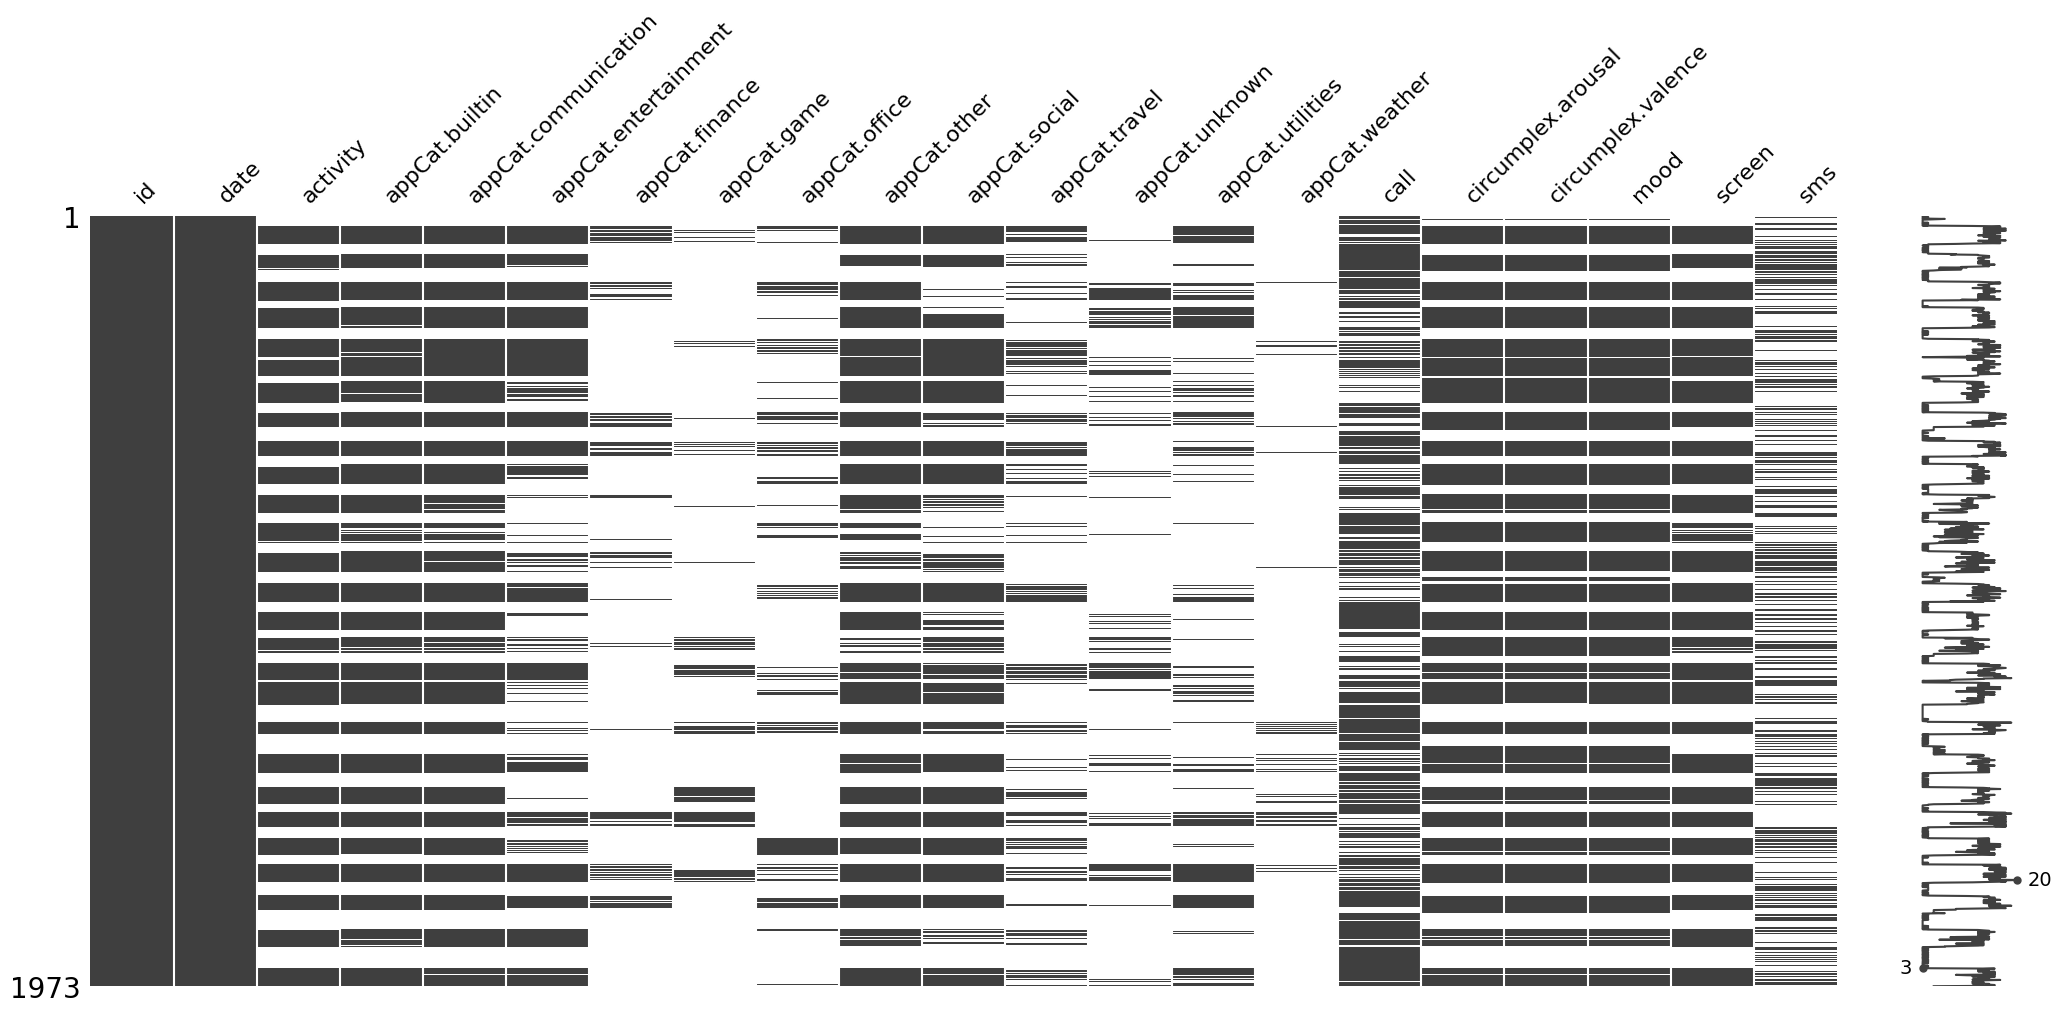

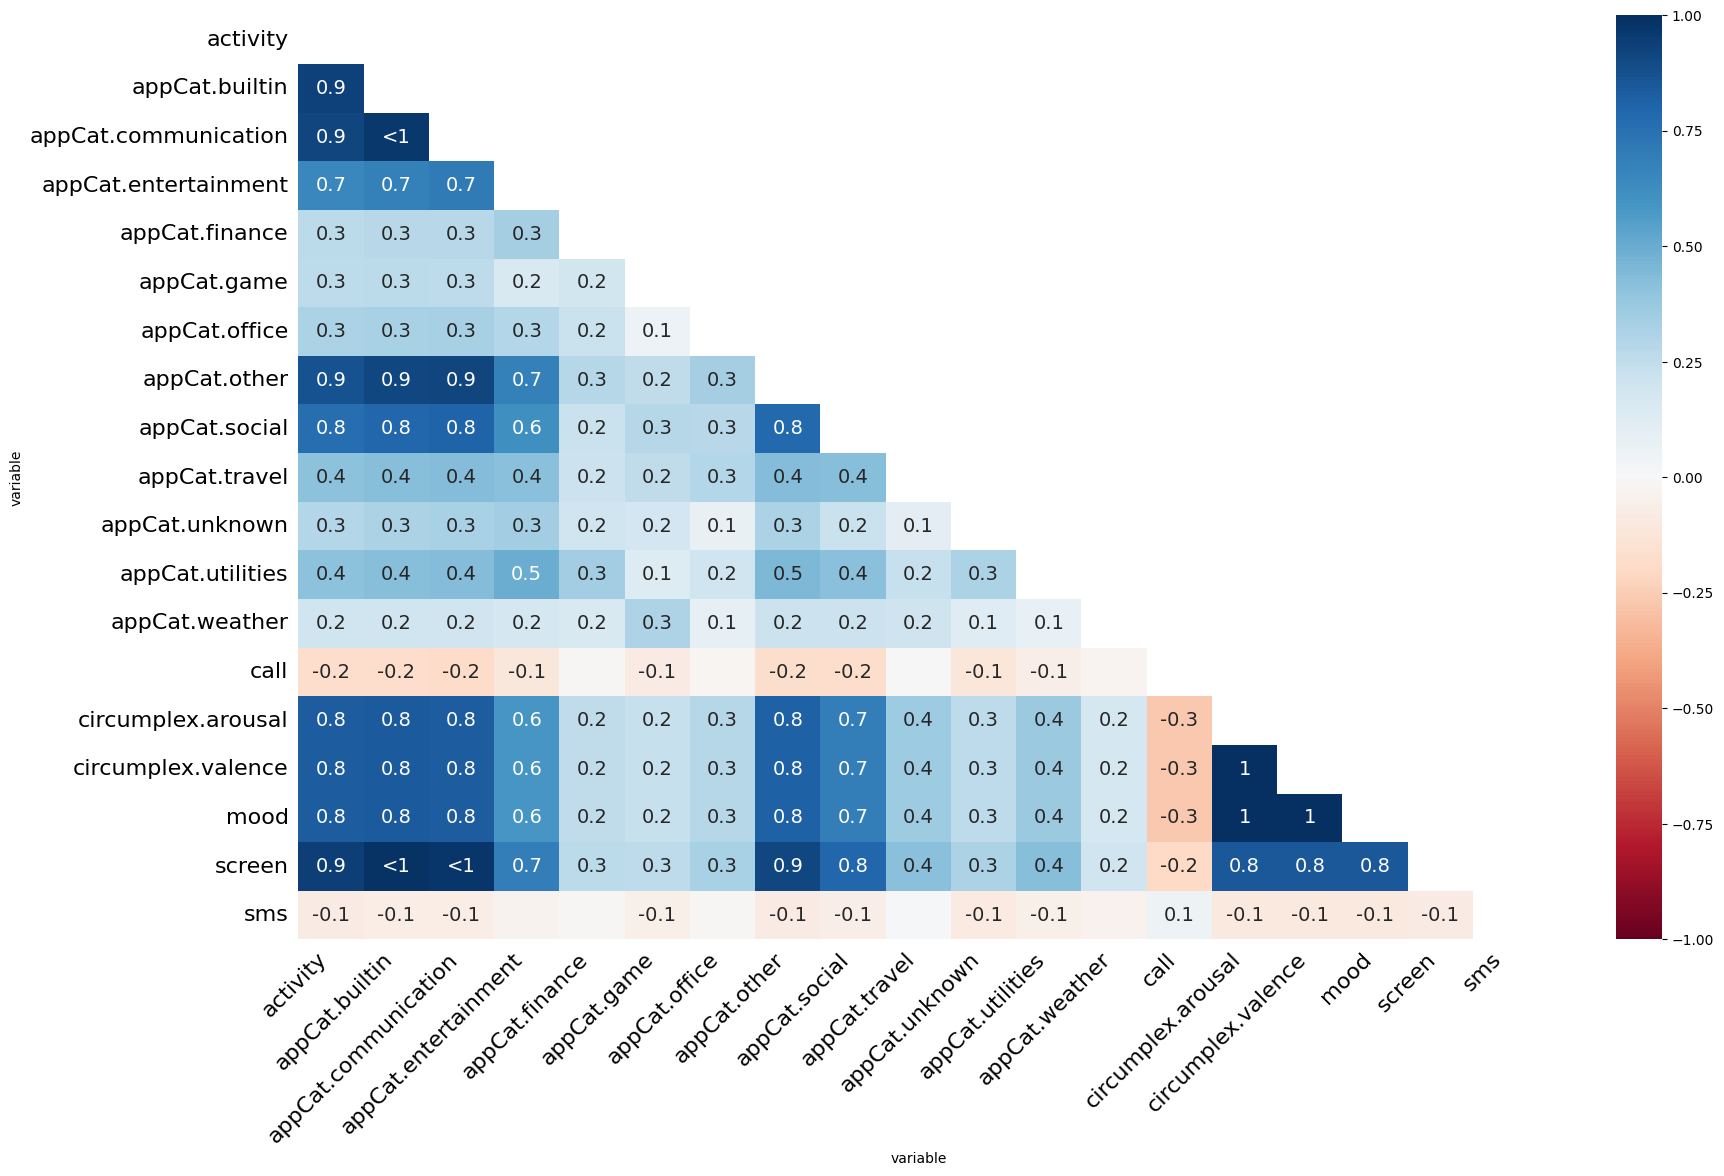

In [10]:
import missingno as msno

msno.bar(new_df)
plt.show()
msno.matrix(new_df)
plt.show()
msno.heatmap(new_df)
plt.show()

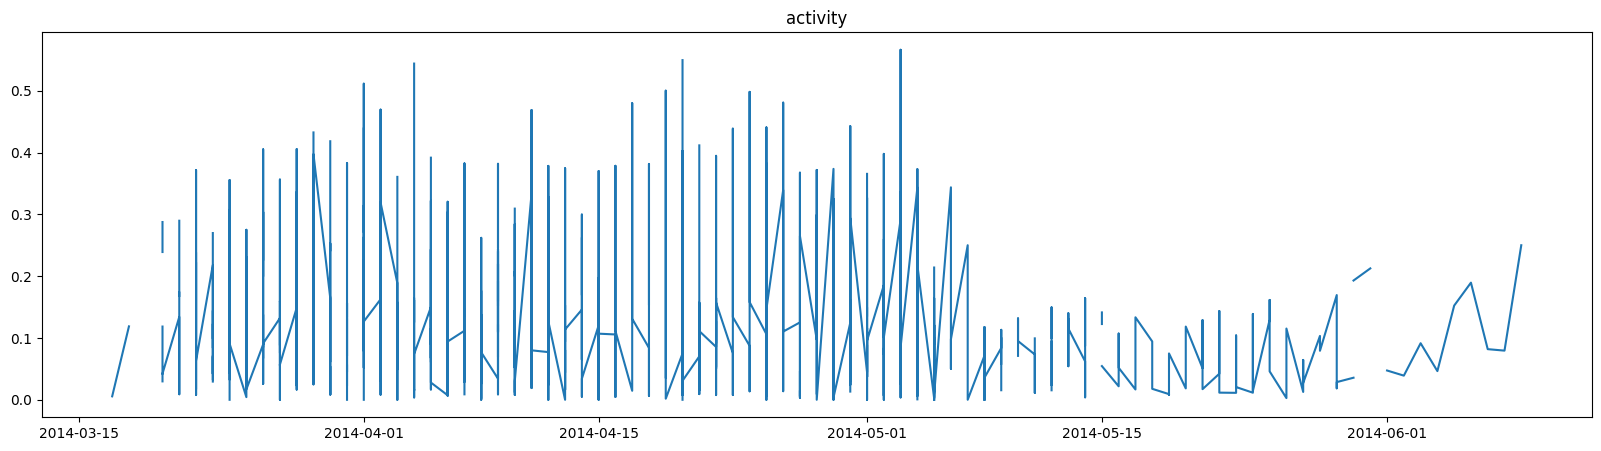

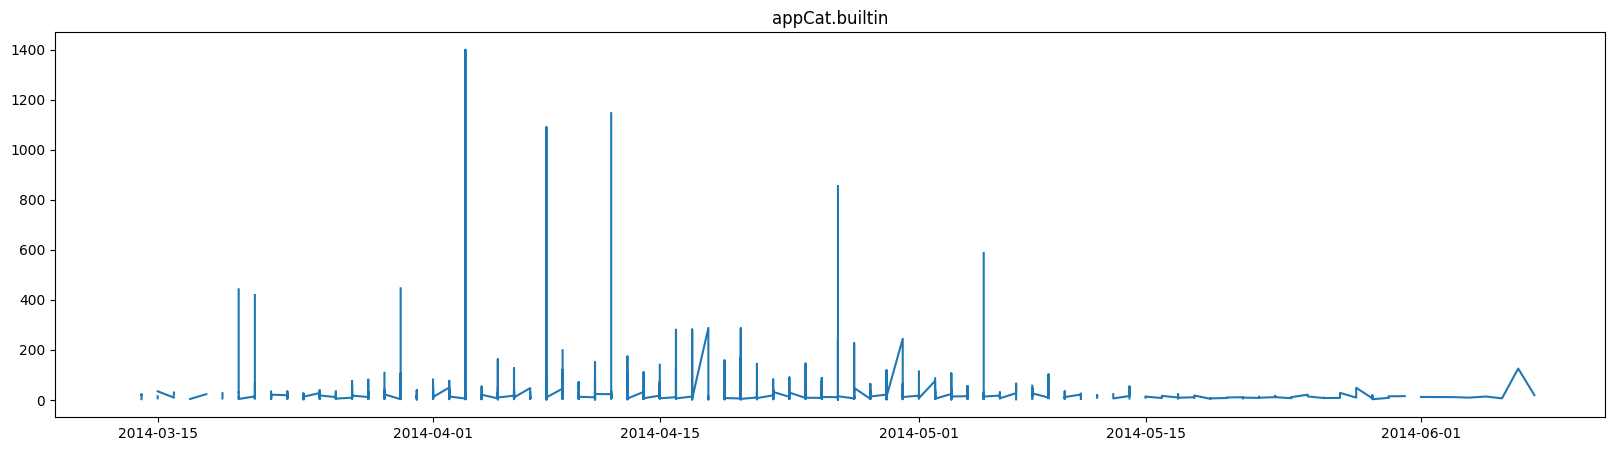

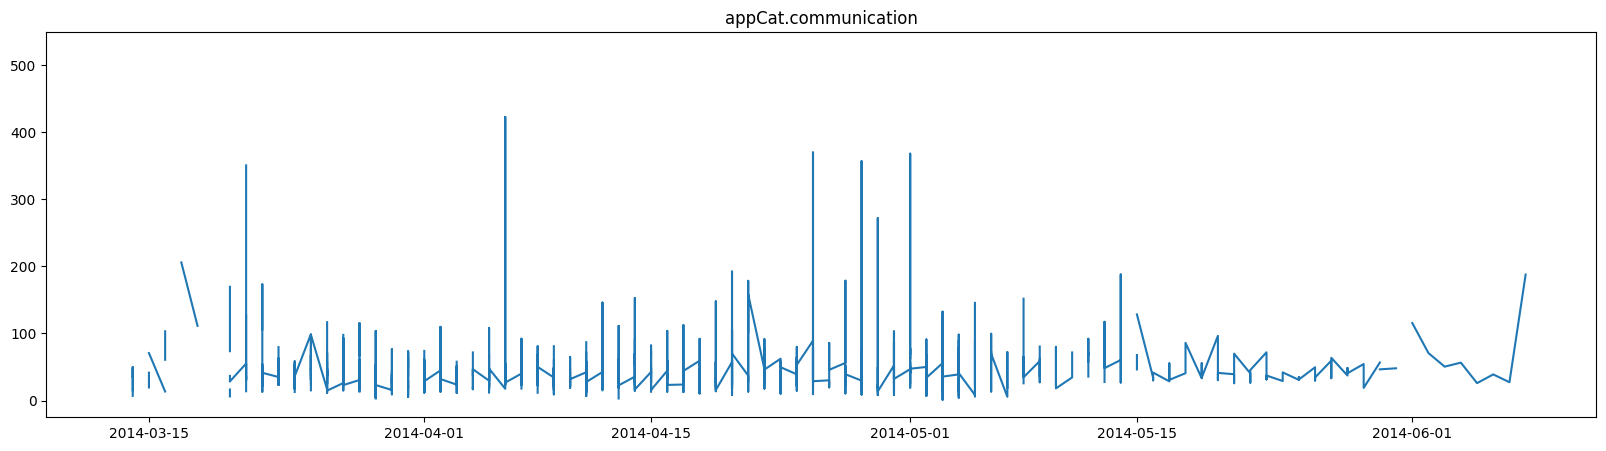

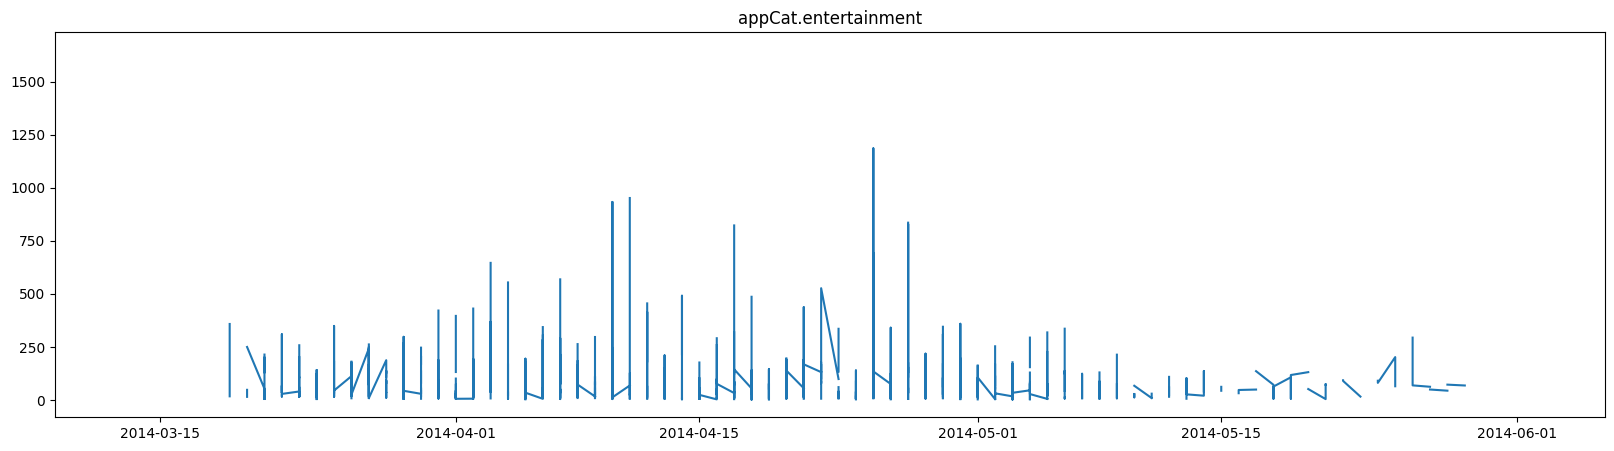

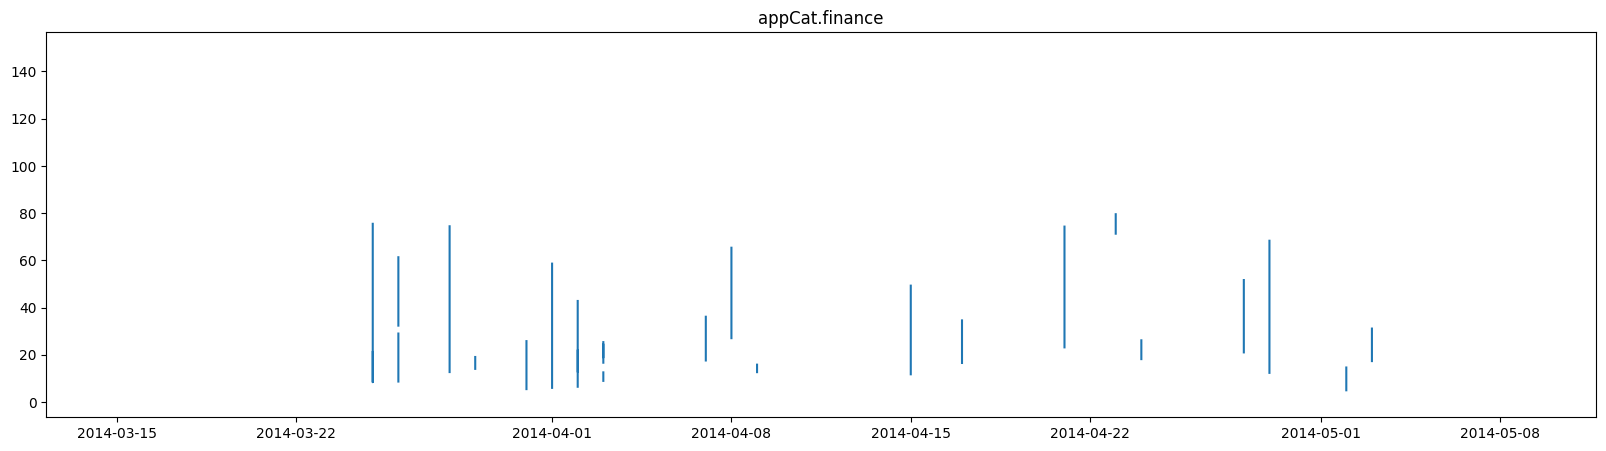

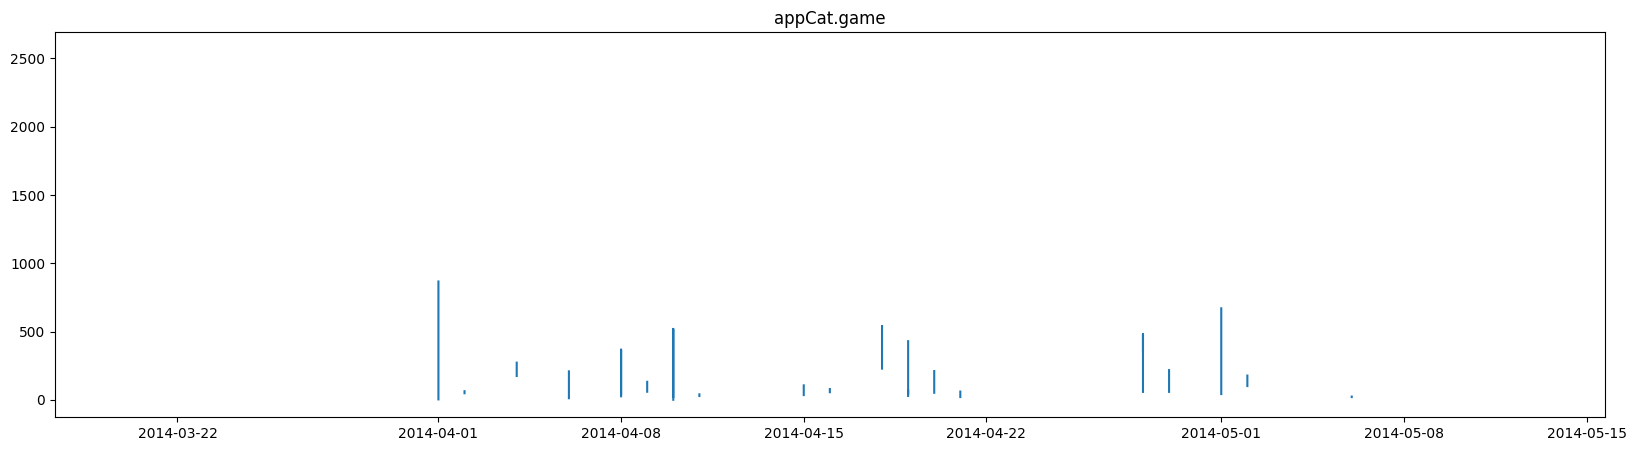

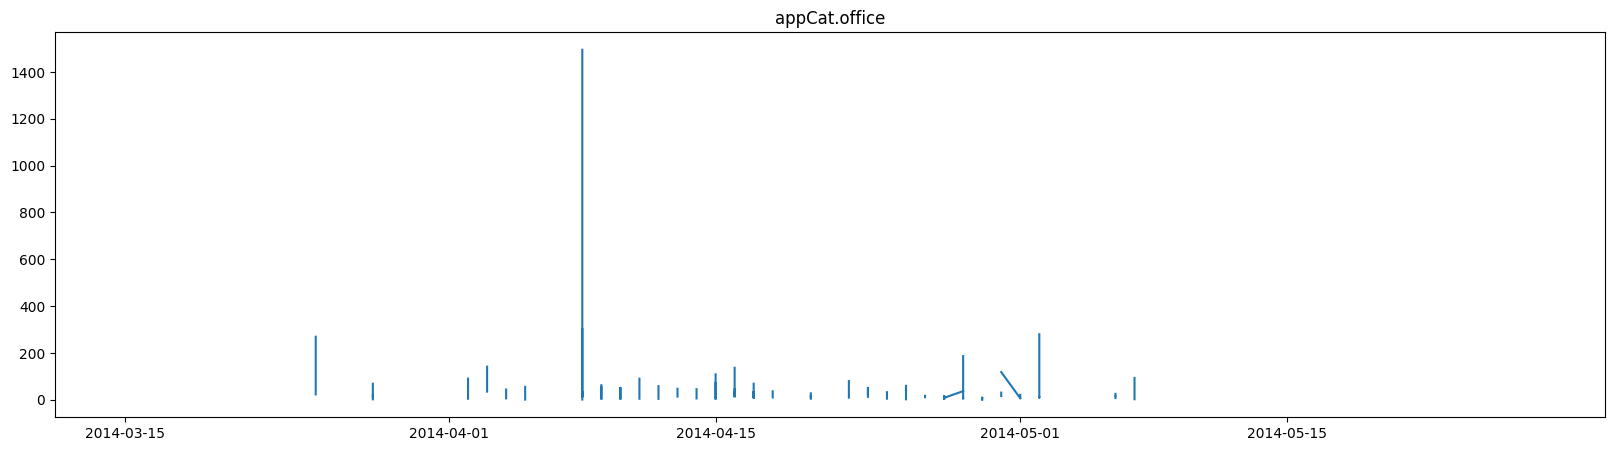

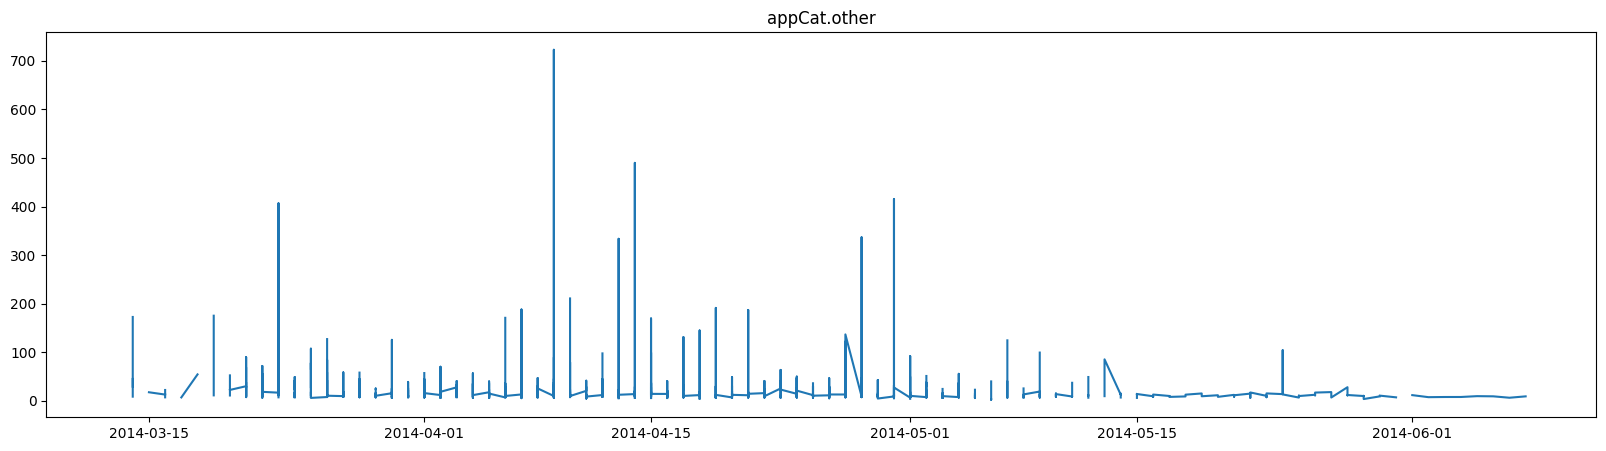

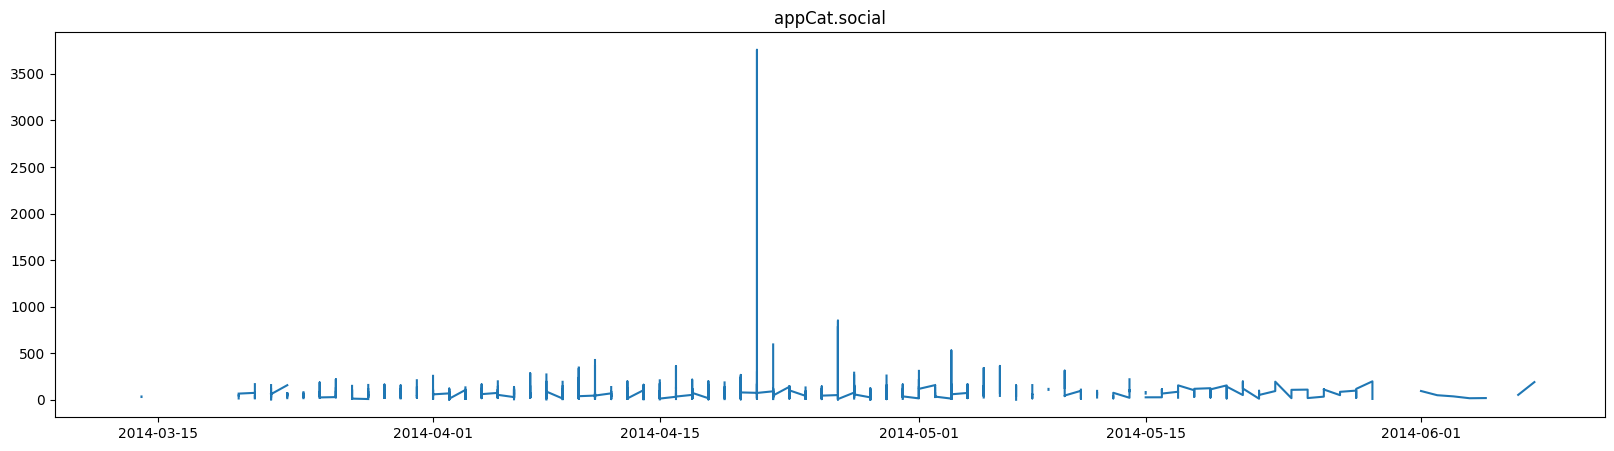

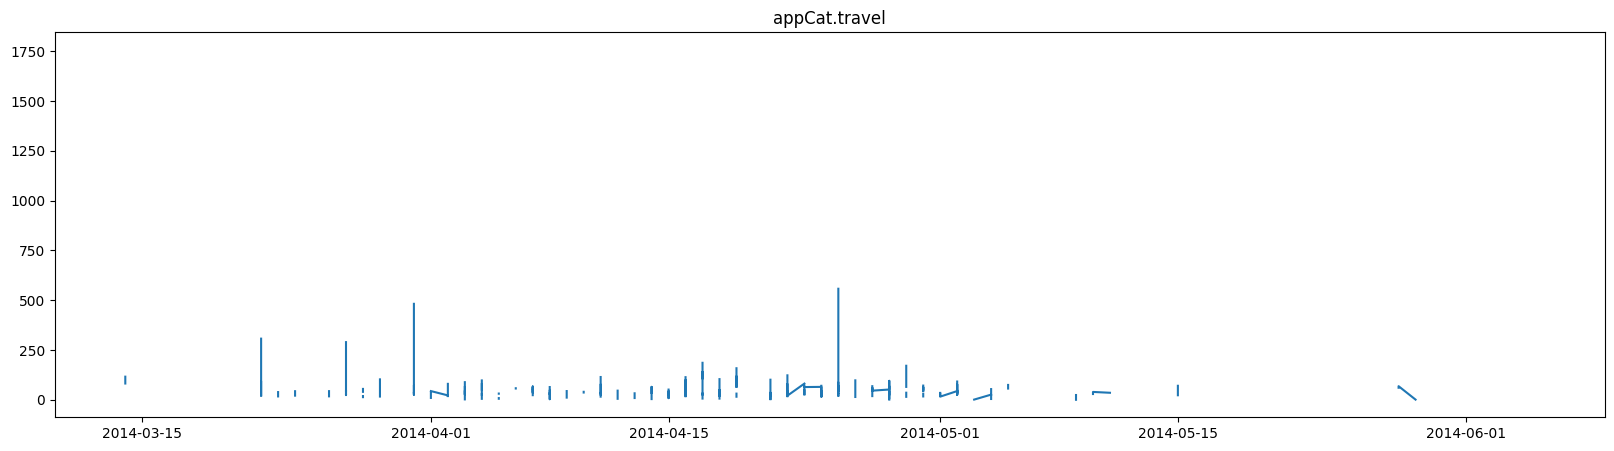

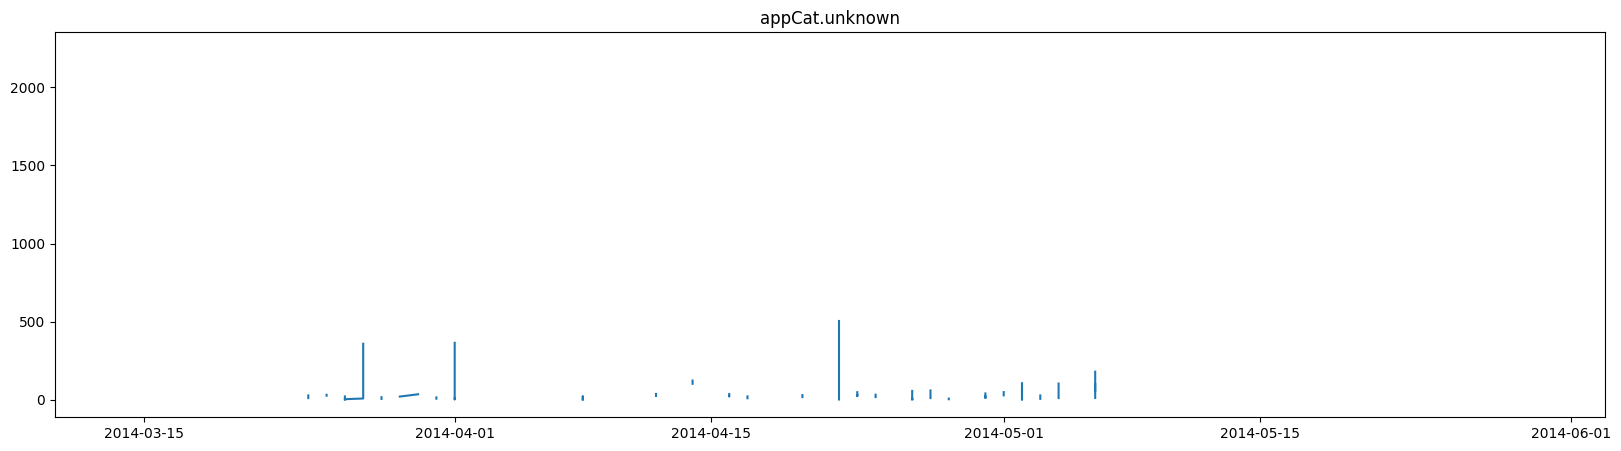

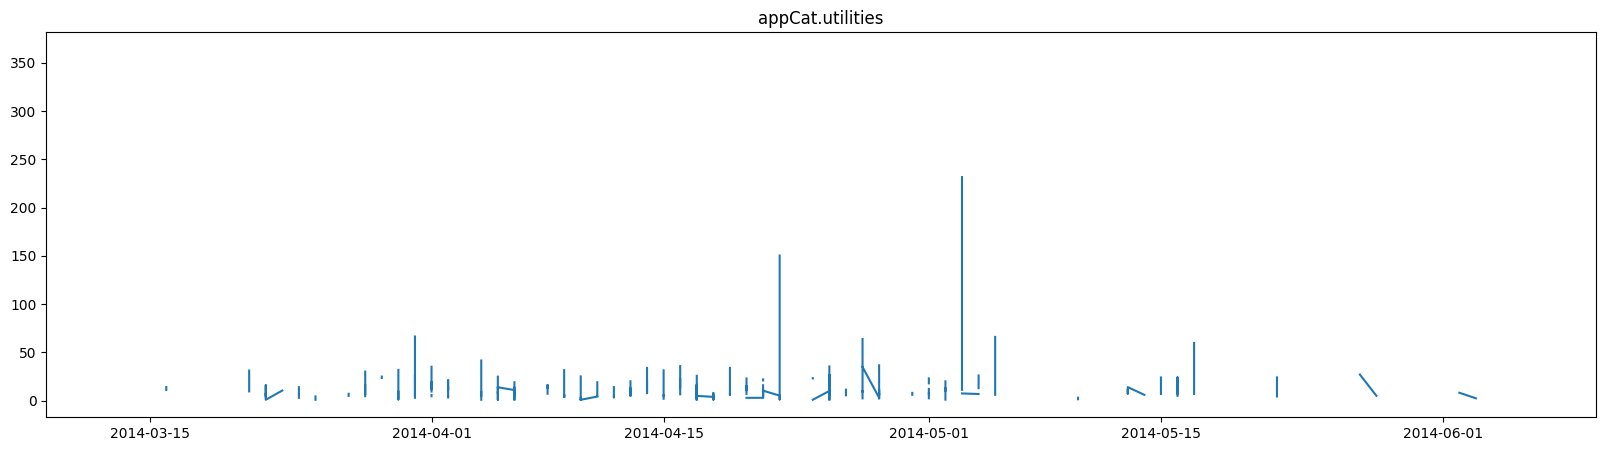

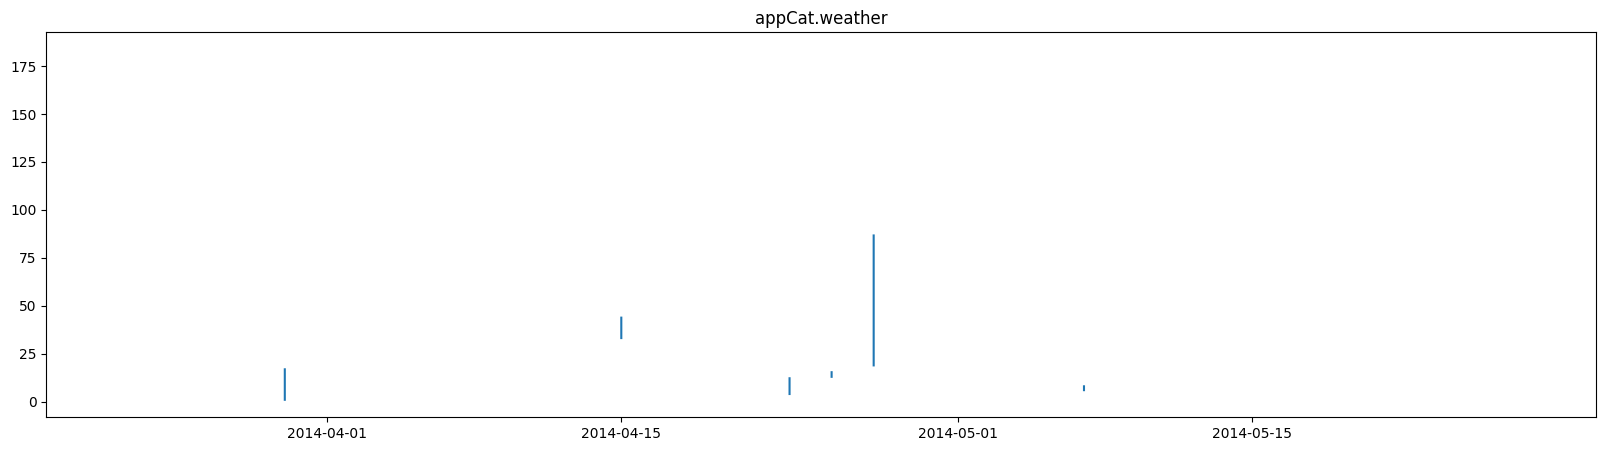

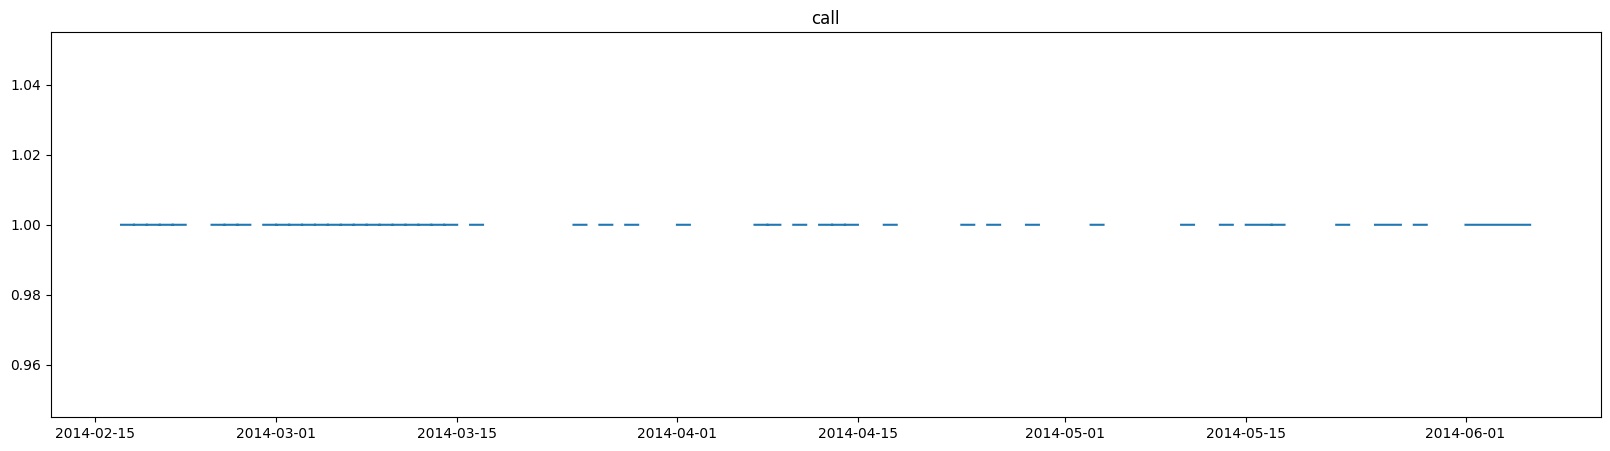

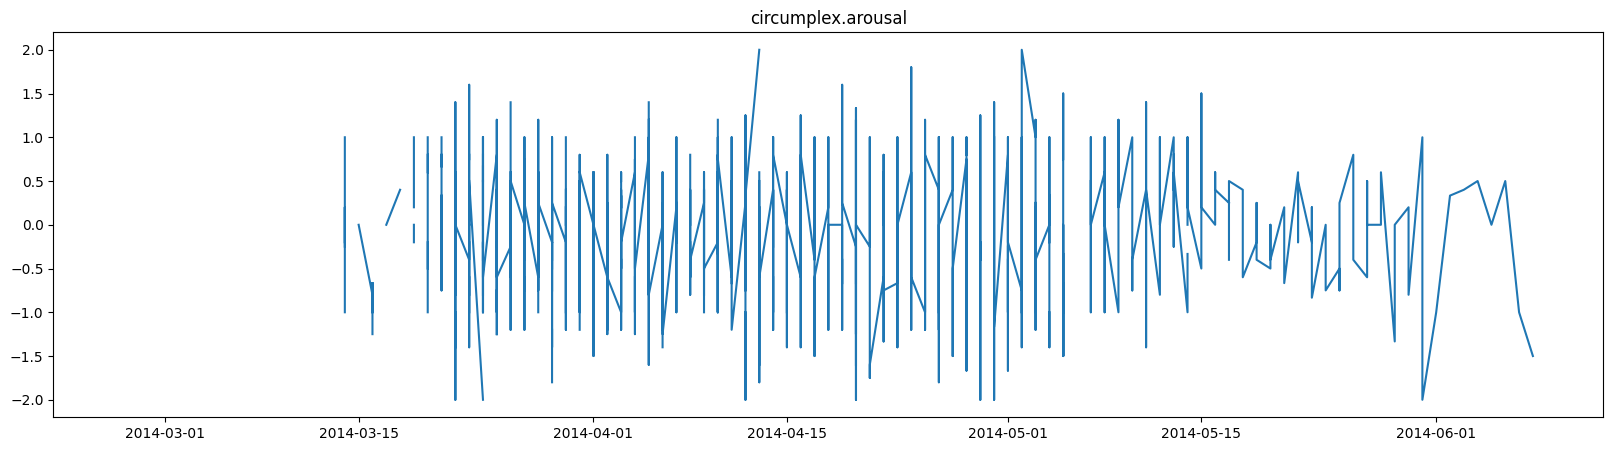

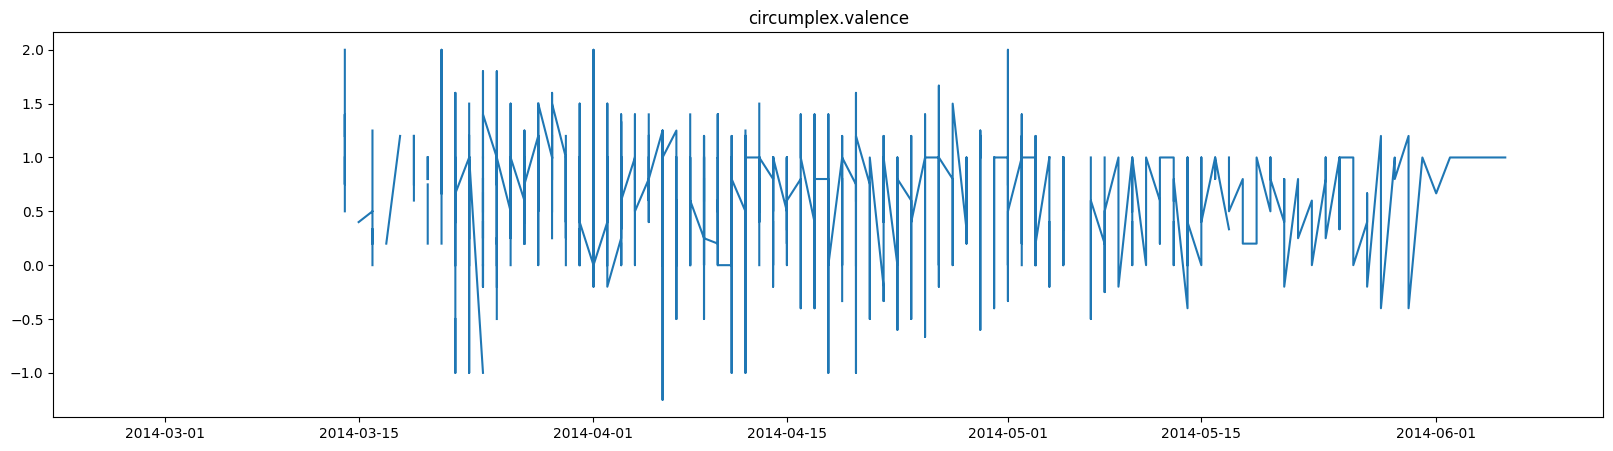

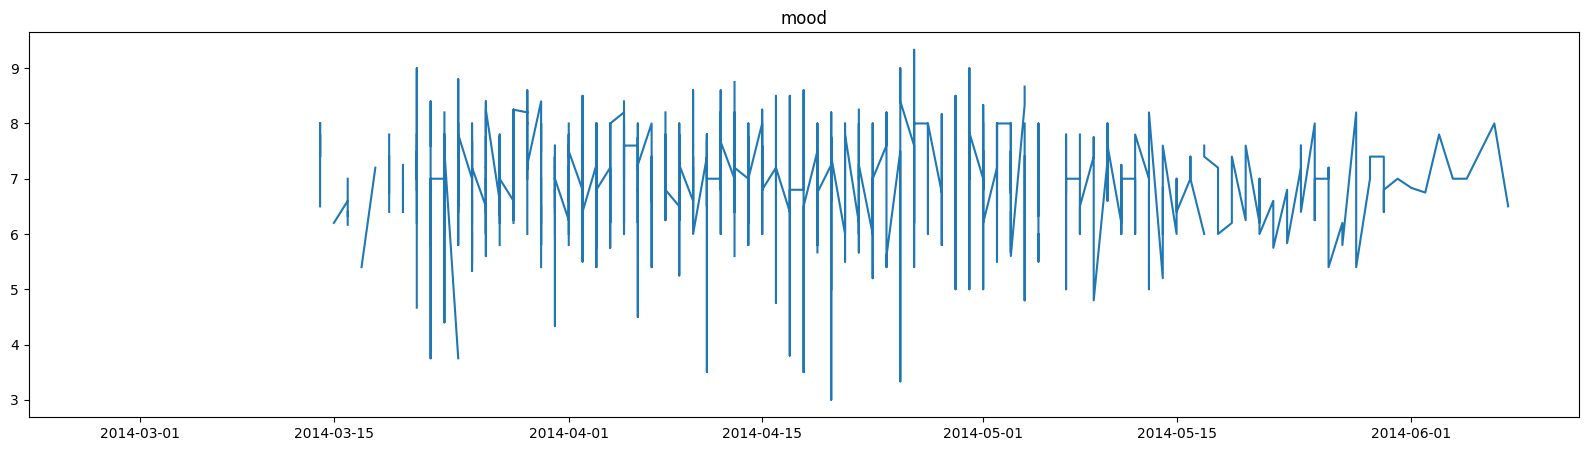

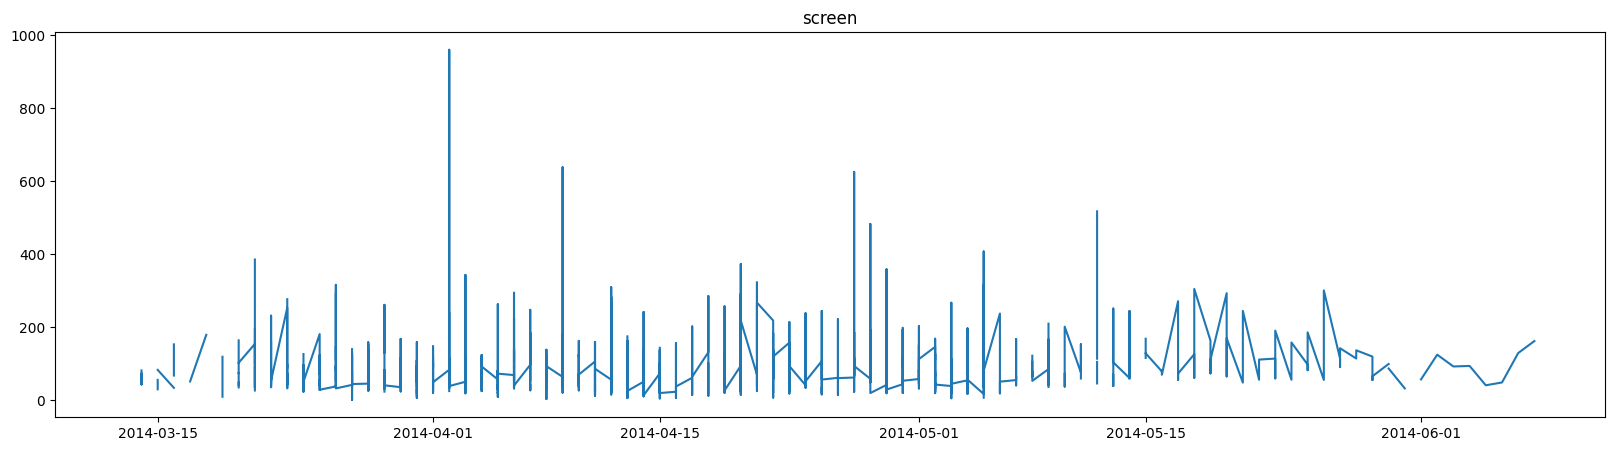

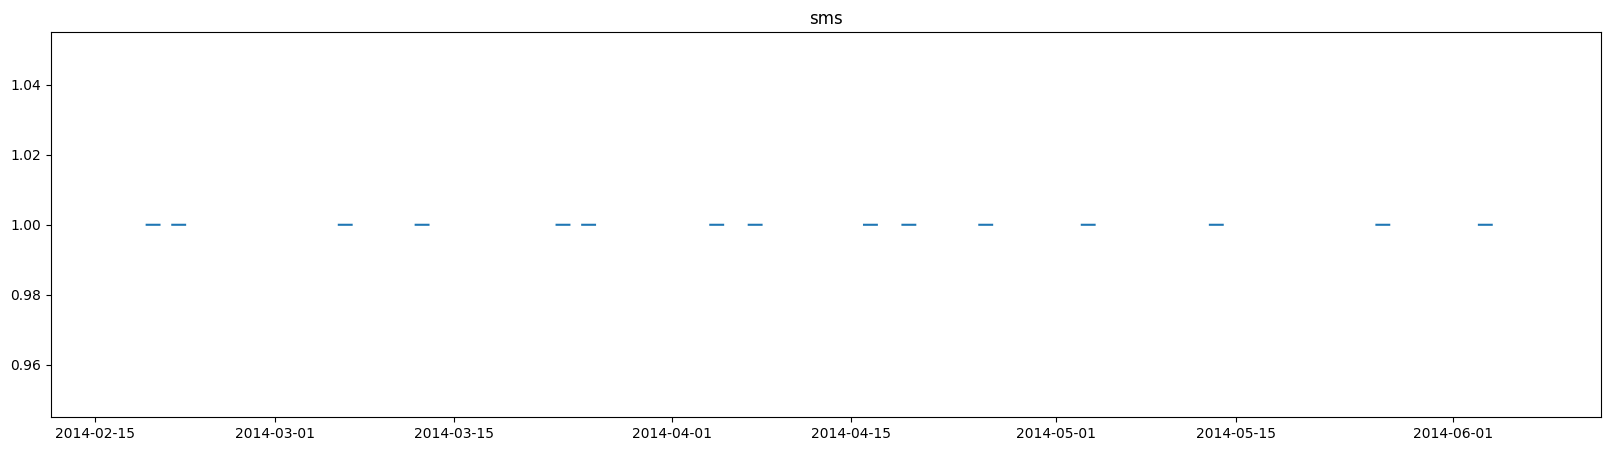

In [11]:
# Sort the dataframe by the 'date' column
df_sort = new_df.sort_values(by='date')

# Create a list of column names to plot
cols_to_plot = df_sort.columns[2:]

# Plot the values of each column sorted by the variable 'date'
for col in cols_to_plot:
    plt.figure(figsize=(20, 5))
    plt.plot(df_sort['date'], df_sort[col])
    plt.title(col)
    plt.show()


#

activity: 1 anomalies, Indexes: {'activity': [133, 1156, 1159, 1175, 1179, 1188]}
appCat.builtin: 2 anomalies, Indexes: {'activity': [133, 1156, 1159, 1175, 1179, 1188], 'appCat.builtin': [181, 190, 732, 750, 759]}
appCat.communication: 3 anomalies, Indexes: {'activity': [133, 1156, 1159, 1175, 1179, 1188], 'appCat.builtin': [181, 190, 732, 750, 759], 'appCat.communication': [467, 473, 730, 792, 828, 1015]}
appCat.entertainment: 4 anomalies, Indexes: {'activity': [133, 1156, 1159, 1175, 1179, 1188], 'appCat.builtin': [181, 190, 732, 750, 759], 'appCat.communication': [467, 473, 730, 792, 828, 1015], 'appCat.entertainment': [393, 397, 640, 1313, 1616]}
appCat.finance: 5 anomalies, Indexes: {'activity': [133, 1156, 1159, 1175, 1179, 1188], 'appCat.builtin': [181, 190, 732, 750, 759], 'appCat.communication': [467, 473, 730, 792, 828, 1015], 'appCat.entertainment': [393, 397, 640, 1313, 1616], 'appCat.finance': [172, 528]}
appCat.game: 6 anomalies, Indexes: {'activity': [133, 1156, 1159, 1

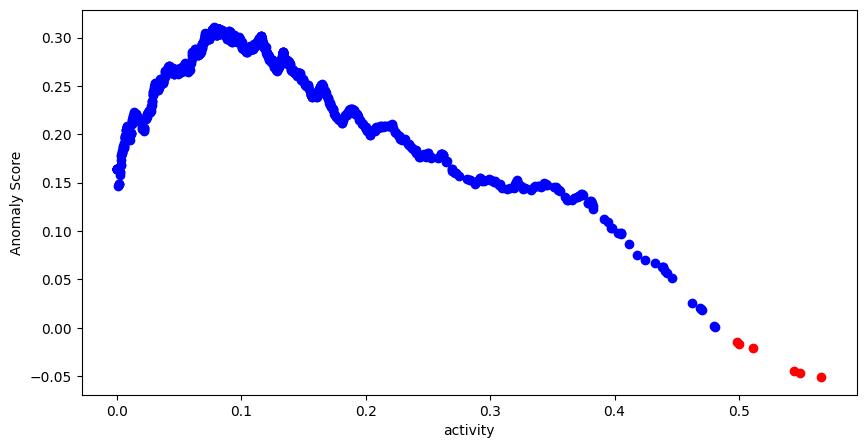

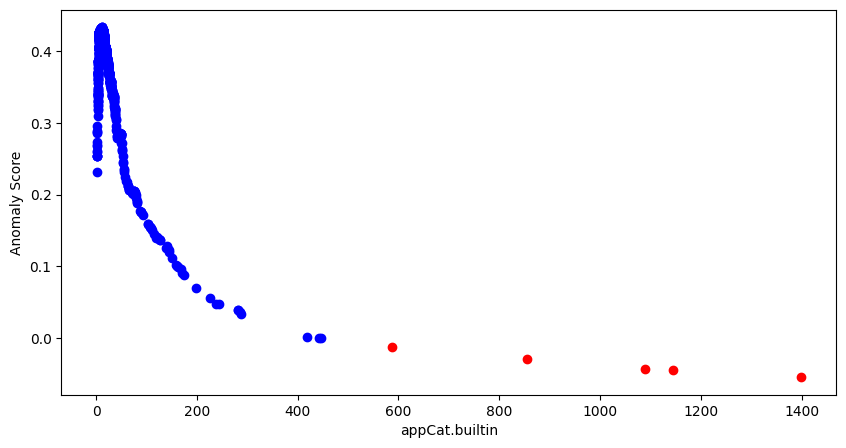

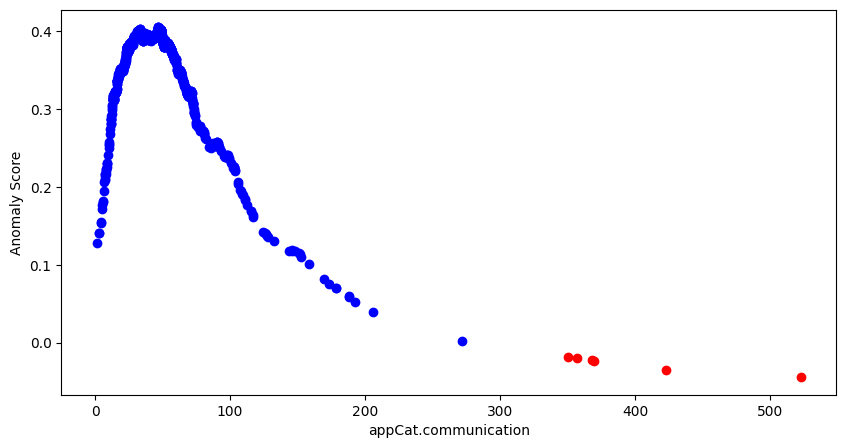

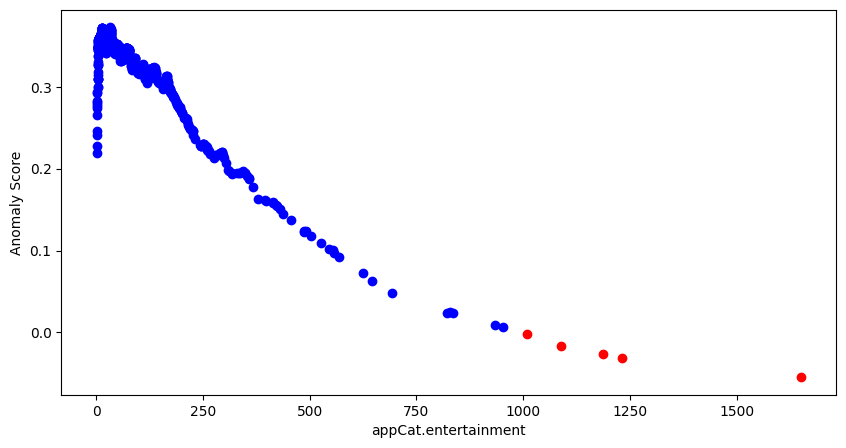

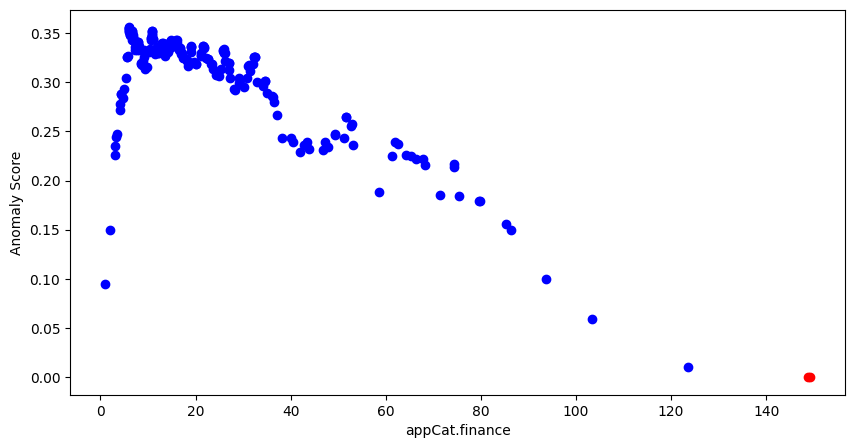

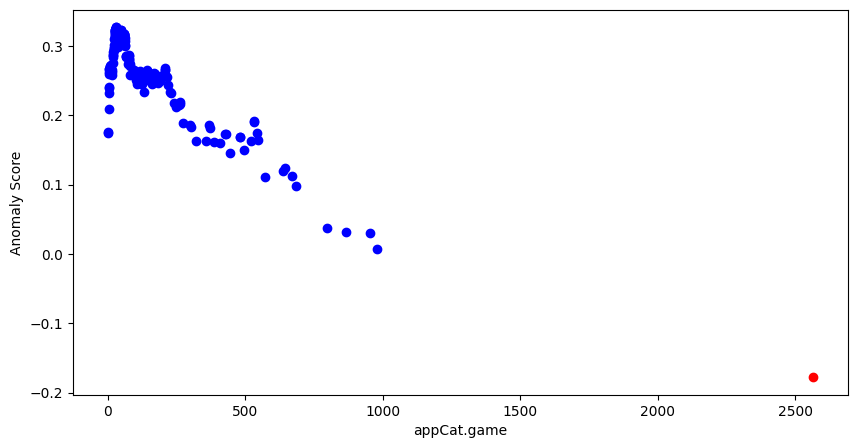

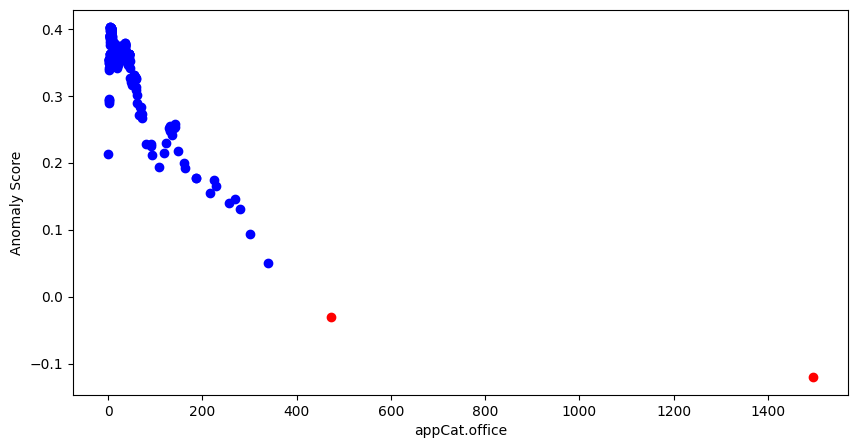

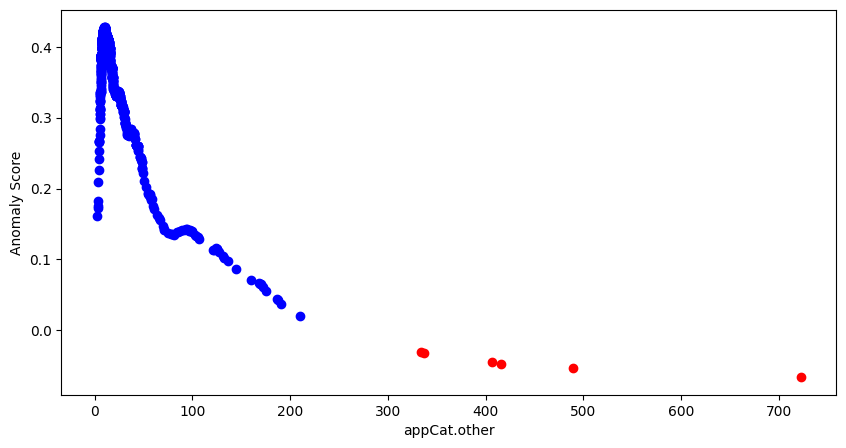

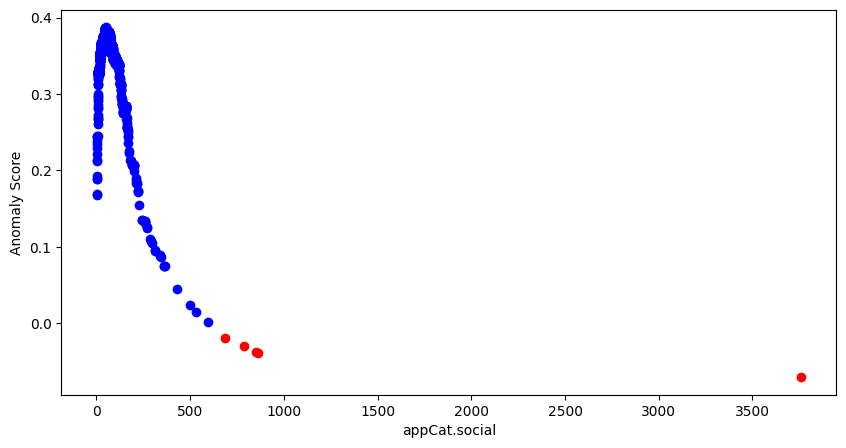

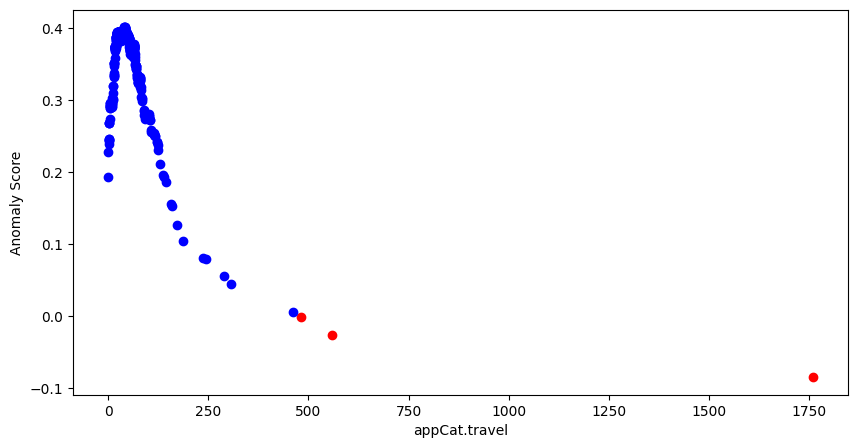

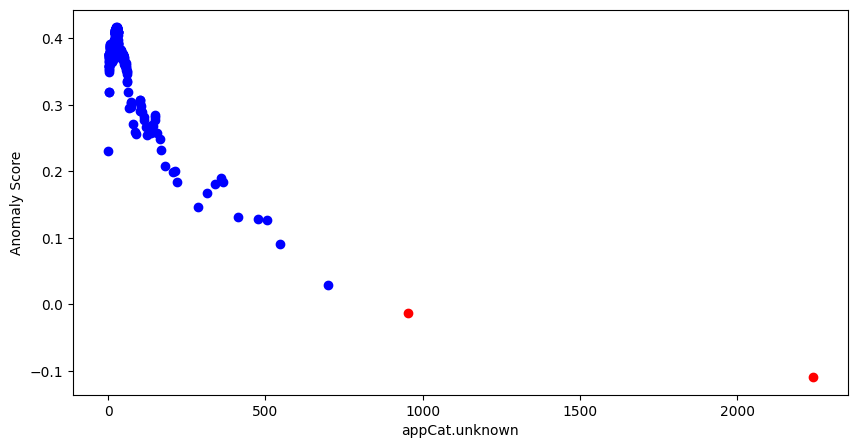

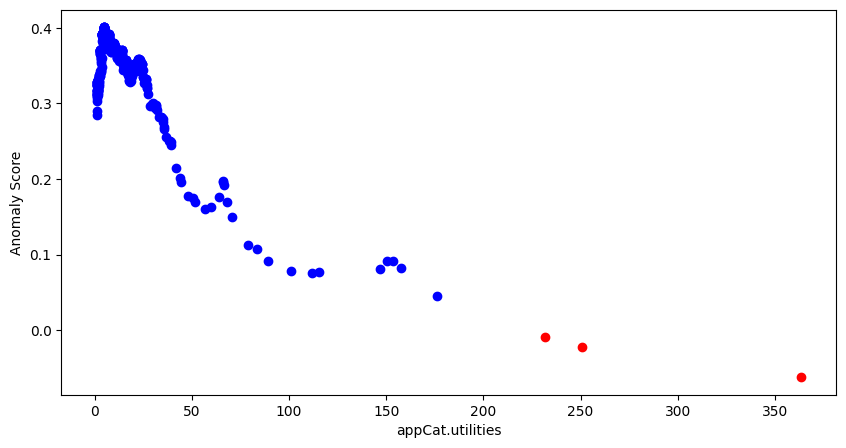

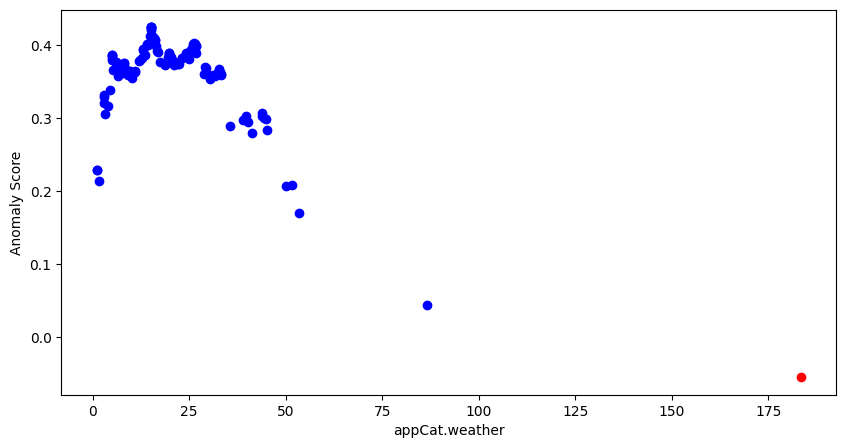

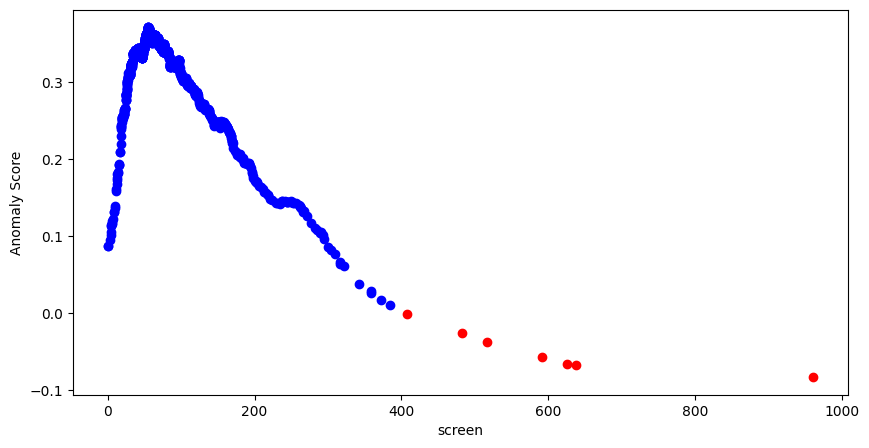

In [12]:
# Create an instance of the DetectAnomalies class
anomaly_detector = DetectAnomalies(contamination=0.005)

# Create a list of columns to be analyzed
columns = ['activity', 'appCat.builtin', 'appCat.communication', 'appCat.entertainment', 'appCat.finance', 'appCat.game',
'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel', 'appCat.unknown', 'appCat.utilities', 'appCat.weather', 'screen']
    
# Call the detect_anomalies method to identify anomalies in the data
anomaly_df, clean_data, anomaly_dict = anomaly_detector.detect_anomalies(new_df, columns)

# Plot the anomalies and non-anomalies for each column
anomaly_detector.plot()

In [13]:
# Remove the index title from the dataframe
clean_data.index.name = None
anomaly_df # 53 rows × 21 columns

# Get the unique rows from the dataframe 

# Count the unique id's in the dataframe
len(anomaly_df['id'].unique()) # 22
len(anomaly_df['date'].unique()) # 34

# Calculate the percentage of missing values for each variable
clean_data.isnull().sum()/len(clean_data) * 100

# Check how many missing values are in the mood variable
clean_data['mood'].isnull().sum() # 703

# Remove the missing values from the target variable
clean_data = clean_data.dropna(subset=['mood']).reset_index(drop=True)

# Check the number of missing values in the imputed data
clean_data.isnull().sum()


variable
id                         0
date                       0
activity                 116
appCat.builtin           111
appCat.communication     121
appCat.entertainment     426
appCat.finance          1018
appCat.game             1035
appCat.office            961
appCat.other             162
appCat.social            291
appCat.travel            814
appCat.unknown           976
appCat.utilities         811
appCat.weather          1109
call                     509
circumplex.arousal         0
circumplex.valence         2
mood                       0
screen                   100
sms                      806
dtype: int64

### IMPUTATION

Before we impute the variables, we need to split the data into train and test because we use information of each variable and their distributions. 

In [14]:
from Preprocessing.datacleaning import impute_with0, ImputeKNN, ImputeIterative

In [15]:
from sklearn.model_selection import TimeSeriesSplit

# Create an instance of TimeSeriesSplit with the number of splits
tscv = TimeSeriesSplit(n_splits = 5) #

for train_index, test_index in tscv.split(clean_data):
    train_data = clean_data.iloc[train_index]
    test_data = clean_data.iloc[test_index]


print(train_data.shape) # (1015, 21)
print(test_data.shape) # (202, 21)

(1015, 21)
(202, 21)


In [16]:
# # Split the time series data into train and test sets
# # first date = 2014-03-10
# # last date = 2014-06-30

# from sklearn.model_selection import TimeSeriesSplit

# # create a TimeSeriesSplit object
# tscv = TimeSeriesSplit(n_splits=5)

# # Define X and y
# X = clean_data.drop(['mood'], axis=1)
# y = clean_data['mood']

# # split your data into train and test sets using TimeSeriesSplit
# for train_index, test_index in tscv.split(X):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
#     # train your model with X_train and y_train, and test it with X_test and y_test

In [17]:
# Define the columns to impute
cols_to_impute = [col for col in train_data.columns if col not in ['id', 'date', 'mood']]

# Impute missing values with 0 for train and test data
zero_train = impute_with0(train_data, cols_to_impute)
zero_test = impute_with0(test_data, cols_to_impute)

# Check the number of missing values in the imputed data
zero_train.isnull().sum()
zero_test.isnull().sum()



variable
id                      0
date                    0
activity                0
appCat.builtin          0
appCat.communication    0
appCat.entertainment    0
appCat.finance          0
appCat.game             0
appCat.office           0
appCat.other            0
appCat.social           0
appCat.travel           0
appCat.unknown          0
appCat.utilities        0
appCat.weather          0
call                    0
circumplex.arousal      0
circumplex.valence      0
mood                    0
screen                  0
sms                     0
dtype: int64

In [18]:
# Create an instance of the Iterative Imputataion class
KNNimputer_train = ImputeKNN(train_data, cols_to_impute)
KNNimputer_test = ImputeKNN(test_data, cols_to_impute)

# Impute missing values and join the imputed data to the original DataFrame
KNN_train = KNNimputer_train.impute()
KNN_test = KNNimputer_test.impute()

# Join with original data
KNN_train_df = KNNimputer_train.join2full(train_data)
KNN_test_df = KNNimputer_test.join2full(test_data)

# Check the number of missing values in the imputed data
KNN_train_df.isnull().sum()
KNN_test_df.isnull().sum()

id                      0
date                    0
mood                    0
activity                0
appCat.builtin          0
appCat.communication    0
appCat.entertainment    0
appCat.finance          0
appCat.game             0
appCat.office           0
appCat.other            0
appCat.social           0
appCat.travel           0
appCat.unknown          0
appCat.utilities        0
appCat.weather          0
call                    0
circumplex.arousal      0
circumplex.valence      0
screen                  0
sms                     0
dtype: int64

In [19]:
# # Split the time series data into train and test sets
# # first date = 2014-03-10
# # last date = 2014-06-30

# from sklearn.model_selection import TimeSeriesSplit

# # create a TimeSeriesSplit object
# tscv = TimeSeriesSplit(n_splits=5)

# # Define X and y
# X = clean_data.drop(['mood'], axis=1)
# y = clean_data['mood']

# # split your data into train and test sets using TimeSeriesSplit
# for train_index, test_index in tscv.split(X):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
#     # train your model with X_train and y_train, and test it with X_test and y_test

In [20]:
# Create an instance of the Iterative Imputataion class
ITimputer_train = ImputeIterative(train_data, cols_to_impute)
ITimputer_test = ImputeIterative(test_data, cols_to_impute)

# Impute missing values and join the imputed data to the original DataFrame
IT_train = ITimputer_train.impute()
IT_test = ITimputer_test.impute()

# Join with original data
IT_train_df = ITimputer_train.join2full(train_data)
IT_test_df = ITimputer_test.join2full(test_data)

# Check the number of missing values in the imputed data
IT_train_df.isnull().sum()
IT_test_df.isnull().sum()

id                      0
date                    0
mood                    0
activity                0
appCat.builtin          0
appCat.communication    0
appCat.entertainment    0
appCat.finance          0
appCat.game             0
appCat.office           0
appCat.other            0
appCat.social           0
appCat.travel           0
appCat.unknown          0
appCat.utilities        0
appCat.weather          0
call                    0
circumplex.arousal      0
circumplex.valence      0
screen                  0
sms                     0
dtype: int64

### TASK 1C: FEATURE ENGINEERING (10 POINTS)
While we now have a clean dataset, we can still take one step before we move to classification
that can in the end help to improve performance, namely feature engineering. As discussed
during the lectures, feature engineering is a creative process and can involve for example the
transformation of values (e.g. take the log of values given a certain distribution of values) or combining multiple features (e.g. two features that are more valuable combined than the two
separate values). Think of a creative feature engineering approach for your dataset, describe
it, and apply it. Report on why you think this is a useful enrichment of your dataset.
Advanced: Essentially there are two approaches you can consider to create a predictive model
using this dataset (which we will do in the next part of this assignment): (1) use a machine
learning approach that can deal with temporal data (e.g. ARIMA, recurrent neural networks)
or you can try to aggregate the history somehow to create attributes that can be used in a
more common machine learning approach (e.g. SVM, decision tree). For instance, you use
the average mood during the last five days as a predictor. Ample literature is present in the
area of temporal data mining that describes how such a transformation can be made. For
the feature engineering, you are going to focus on such a transformation in this part of the
assignment. This is illustrated in Figure 1.

In the end, we end up with a dataset with a number of training instances per patient (as
you have a number of time points for which you can train), i.e. an instance that concerns
the mood at t=1, t=2, etc. Of course it depends on your choice of the history you consider
relevant from what time point you can start predicting (if you use a windows of 5 days of
history to create attributes you cannot create training instances before the 6th day). To come
to this dataset, you need to:

1. Define attributes that aggregate the history, draw inspiration from the field of temporal
data mining.
2. Define the target by averaging the mood over the entire day.
3. Create an instance-based dataset as described in Figure 1.

In [21]:
from Preprocessing.featureengineering import feature_engineering

In [22]:
# Feature engineering zero data
zero_train_fe = feature_engineering(zero_train)
zero_test_fe = feature_engineering(zero_test)

# Feature engineering KNN data
KNN_train_fe = feature_engineering(KNN_train_df)
KNN_test_fe = feature_engineering(KNN_test_df)

# Feature engineering Iterative data
IT_train_fe = feature_engineering(IT_train_df)
IT_test_fe = feature_engineering(IT_test_df)

In [23]:
# fe_df.groupby('id').size()

# # Get the count of the number of days recorded for each participant from the num_dates_recorded column

# max(fe_df['day_num_days'])

# # Select the unique day_num_days per id 
# test = fe_df.drop_duplicates(subset=['id', 'day_num_days'])
# test['day_num_days']


### SCALING


In [24]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# class Scaler:
#     """
#     Variables containing 'mood': No scaling is required for the target variable as it is already on a scale of 1-10.
#     Variables containing 'circumplex.arousal' or 'circumplex.valence': These variables have a range between -2 to 2 and are centered around 0, 
#     making them suitable for StandardScaler.
#     Variables containing 'activity': This variable has a range between 0 to 1 and is also suitable for MinMaxScaler.
#     Variables containing 'screen': This variable has a wide range and may contain outliers, making it suitable for RobustScaler.
#     Variables containing 'call' and 'sms': These variables are binary and do not require scaling.
#     Variables containing 'appCat.*': These variables represent the duration of usage of different types of apps and may have a wide range and outliers, 
#     making them suitable for RobustScaler.
#     """
    
#     def __init__(self, train_data):
#         self.scalers = {}
        
#         for column in train_data.columns:
#             if column == 'mood':
#                 continue
#             elif 'circumplex.arousal' in column or 'circumplex.valence' in column:
#                 scaler = StandardScaler()
#                 scaler.fit(train_data[[column]])
#                 self.scalers[column] = scaler
#             elif 'activity' in column:
#                 scaler = MinMaxScaler()
#                 scaler.fit(train_data[[column]])
#                 self.scalers[column] = scaler
#             elif 'screen' in column:
#                 scaler = RobustScaler()
#                 scaler.fit(train_data[[column]])
#                 self.scalers[column] = scaler
#             elif 'call' in column or 'sms' in column:
#                 continue
#             elif 'appCat.' in column:
#                 scaler = RobustScaler()
#                 scaler.fit(train_data[[column]])
#                 self.scalers[column] = scaler
#             else:
#                 continue
    
#     def transform(self, data):
#         for column in data.columns:
#             if column == 'mood':
#                 continue
#             elif column in self.scalers:
#                 data[column] = self.scalers[column].transform(data[[column]])
#         return data


In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

class Scaler:
    """
    Variables containing 'mood': No scaling is required for the target variable as it is already on a scale of 1-10.
    Variables containing 'circumplex.arousal' or 'circumplex.valence': These variables have a range between -2 to 2 and are centered around 0, 
    making them suitable for StandardScaler.
    Variables containing 'activity': This variable has a range between 0 to 1 and is also suitable for MinMaxScaler.
    Variables containing 'screen': This variable has a wide range and may contain outliers, making it suitable for RobustScaler.
    Variables containing 'call' and 'sms': These variables are binary and do not require scaling.
    Variables containing 'appCat.*': These variables represent the duration of usage of different types of apps and may have a wide range and outliers, 
    making them suitable for RobustScaler.
    """

    def __init__(self):
        self.scalers = {}

    def fit_transform(self, X):
        """
        Fit and transform the input data frame X based on the scaling instructions.
        """
        for col in X.columns:
            if 'mood' in col:
                continue
            elif 'circumplex.arousal' in col or 'circumplex.valence' in col:
                scaler = StandardScaler()
                X[col] = scaler.fit_transform(X[[col]])
                self.scalers[col] = scaler
            elif 'activity' in col:
                scaler = MinMaxScaler()
                X[col] = scaler.fit_transform(X[[col]])
                self.scalers[col] = scaler
            elif 'screen' in col:
                scaler = RobustScaler()
                X[col] = scaler.fit_transform(X[[col]])
                self.scalers[col] = scaler
            elif 'call' in col or 'sms' in col:
                continue
            elif 'appCat' in col:
                scaler = RobustScaler()
                X[col] = scaler.fit_transform(X[[col]])
                self.scalers[col] = scaler
            else:
                continue
        return X

    def transform(self, X):
        """
        Transform the input data frame X based on the scaling instructions.
        """
        for col in X.columns:
            if 'mood' in col:
                continue
            elif 'circumplex.arousal' in col or 'circumplex.valence' in col:
                scaler = self.scalers.get(col)
                if scaler is None:
                    raise ValueError("Scaler not fitted for column: {}".format(col))
                X[col] = scaler.transform(X[[col]])
            elif 'activity' in col:
                scaler = self.scalers.get(col)
                if scaler is None:
                    raise ValueError("Scaler not fitted for column: {}".format(col))
                X[col] = scaler.transform(X[[col]])
            elif 'screen' in col:
                scaler = self.scalers.get(col)
                if scaler is None:
                    raise ValueError("Scaler not fitted for column: {}".format(col))
                X[col] = scaler.transform(X[[col]])
            elif 'call' in col or 'sms' in col:
                continue
            elif 'appCat' in col:
                scaler = self.scalers.get(col)
                if scaler is None:
                    raise ValueError("Scaler not fitted for column: {}".format(col))
                X[col] = scaler.transform(X[[col]])
            else:
                continue
        return X


In [29]:
# create Scaler instance
scaler = Scaler()

# fit and transform data using the Scaler
scaled_data = scaler.fit_transform(zero_test_fe)

# Print the first 5 rows of the scaled data
scaled_data.head(5)

,id,date,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,circumplex.arousal_circumplex.valence,circumplex.arousal_mood,circumplex.arousal_screen,circumplex.arousal_sms,circumplex.valence_mood,circumplex.valence_screen,circumplex.valence_sms,mood_screen,mood_sms,screen_sms
1021,AS14.29,2014-04-12,0.240239,-0.550092,-0.299308,-0.063604,0.000,0.0,0.621620,-0.119311,...,1.315087,8.250,0.933468,2.792757,6.1875,-0.506691,1.256091,354.704758,8.25,0.626047
1022,AS14.29,2014-04-13,0.156027,1.952793,-0.655580,-0.316844,0.000,0.0,0.712409,-0.359081,...,0.201994,0.000,0.519113,0.121649,4.9200,0.038789,-0.578622,1041.355645,0.00,0.000000
1023,AS14.29,2014-04-14,0.293683,1.243513,-0.323003,0.042148,0.000,0.0,1.078213,1.006623,...,-0.985305,-6.400,-0.131072,0.121649,8.0000,0.139748,-0.578622,674.649979,0.00,0.000000
1024,AS14.29,2014-04-15,0.410662,-0.148750,-0.245130,-0.203916,0.000,0.0,0.864845,0.012506,...,-0.540068,-4.125,0.195315,-1.213905,8.2500,-0.072917,1.867662,554.369348,8.25,0.978451
1025,AS14.29,2014-04-16,0.066347,-0.250910,-0.238418,0.989165,1.004,0.0,0.768341,0.291434,...,0.201994,0.000,0.519113,0.121649,7.8000,0.304888,1.867662,761.569239,7.80,1.421701
